<a href="https://colab.research.google.com/github/Arwa678/IT326-Group-3/blob/main/dataminning326.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the project
In our project, we chose the **Heart Health dataset** because heart disease is one of the leading causes of death worldwide.
Understanding the factors that contribute to heart disease is crucial for prevention. The dataset provides important information such as
age, gender, blood pressure, cholesterol levels, and other health-related factors which are key indicators of heart health.

By analyzing this data, we hope to identify patterns and risk factors that can help predict heart disease.
This could be valuable for healthcare professionals in developing strategies to prevent heart disease and improve patient care.
Our goal is to contribute to better heart health by using data to spot trends and offer insights into managing heart disease risk.

## Dataset Source:
The Heart Health dataset is provided for research and analysis to better understand the risk factors contributing to heart disease.

link: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download

## Goal:
The goal of this dataset is to predict the likelihood of a heart attack based on various health metrics, including blood pressure, cholesterol, glucose levels# smoking habits, and exercise patterns. This analysis will aid in early detection and prevention strategies for heart disease.

## Class label
The class label "HadHeartAttack" is a binary variable indicating whether a respondent has experienced a heart attack. It is categorized as "Yes" if the respondent had heart disease and "No" if the respondent did not have heart disease. This label is crucial for classification tasks aimed at identifying individuals at risk of heart disease.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv('/content/heart_2022_with_nans.csv')
df1 = pd.DataFrame(df)
print(df1)

                 State     Sex GeneralHealth  PhysicalHealthDays  \
0              Alabama  Female     Very good                 0.0   
1              Alabama  Female     Excellent                 0.0   
2              Alabama  Female     Very good                 2.0   
3              Alabama  Female     Excellent                 0.0   
4              Alabama  Female          Fair                 2.0   
...                ...     ...           ...                 ...   
445127  Virgin Islands  Female          Good                 0.0   
445128  Virgin Islands  Female     Excellent                 2.0   
445129  Virgin Islands  Female          Poor                30.0   
445130  Virgin Islands    Male     Very good                 0.0   
445131  Virgin Islands    Male     Very good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
0                    0.0  Within past year (anytime less than 12 months ...   
1                    0.0 

In [ ]:
class_label = df['HadHeartAttack']
df = df.drop(columns=['HadHeartAttack'])
df['HadHeartAttack'] = class_label

the code bellow shows the types of each attribute

In [ ]:
print(df.dtypes)

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
ChestScan                     object
R

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadAngina                  440727 non-null  object 
 10  HadStroke                  443575 non-null  object 
 11  HadAsthma                  443359 non-null  object 
 12  HadSkinCancer              441989 non-null  object 
 13  HadCOPD                    44

the code below lists all the attributes of the dataset

In [ ]:
col_name = df.columns
print(col_name)

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
       'BlindOrVisionDifficulty', 'DifficultyConcentrating',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'HadHeartAttack'],
      dtype='object')


our dataset contains 445132 samples and 40 attributes

In [ ]:
col = df.columns
print('Number of attributes :',len(col))

Number of attributes : 40


In [ ]:
num_of_rows = len(df)
print('Number of rows :',num_of_rows)

Number of rows : 445132


---
---
#Phase 2


#Sampling
We took a balanced dataset where the class label values were distributed within 40% and 60%.

In [ ]:
# Check initial class distribution
print("Original class distribution:\n", df['HadHeartAttack'].value_counts())

# Set desired total sample size and calculate required samples for each class
total_sample_size = 30000  # Desired sample size
HadHeartAttack_1_sample_size = int(total_sample_size * 0.4)  # 40% for HadHeartAttack = yes
HadHeartAttack_0_sample_size = total_sample_size - HadHeartAttack_1_sample_size  # 60% for HadHeartAttack = 0

# Check if there are enough rows for each class
if df[df['HadHeartAttack'] == 'Yes'].shape[0] < HadHeartAttack_1_sample_size:
    HadHeartAttack_1_sample_size = df[df['HadHeartAttack'] == 'Yes'].shape[0]
if df[df['HadHeartAttack'] == 'No'].shape[0] < HadHeartAttack_0_sample_size:
    HadHeartAttack_0_sample_size = df[df['HadHeartAttack'] == 'No'].shape[0]

# Sample from each class
balanced_sample = pd.concat([
    df[df['HadHeartAttack'] == 'Yes'].sample(HadHeartAttack_1_sample_size, replace=True, random_state=42),
    df[df['HadHeartAttack'] =='No'].sample(HadHeartAttack_0_sample_size, replace=True, random_state=42)
])

# Verify the balanced sample distribution
print("Balanced sample class distribution:\n", balanced_sample['HadHeartAttack'].value_counts())

print(balanced_sample)

Original class distribution:
 HadHeartAttack
No     416959
Yes     25108
Name: count, dtype: int64
Balanced sample class distribution:
 HadHeartAttack
No     18000
Yes    12000
Name: count, dtype: int64
                State     Sex GeneralHealth  PhysicalHealthDays  \
418923  West Virginia    Male          Fair                24.0   
283046   North Dakota  Female     Very good                 0.0   
12937         Arizona    Male     Very good                 0.0   
95486           Idaho    Male     Very good                 0.0   
379670       Virginia  Female          Fair                30.0   
...               ...     ...           ...                 ...   
34786      California    Male          Good                 0.0   
289828           Ohio  Female          Good                 3.0   
43343        Colorado  Female     Very good                 0.0   
308861         Oregon  Female          Fair                25.0   
179459  Massachusetts    Male     Very good                 

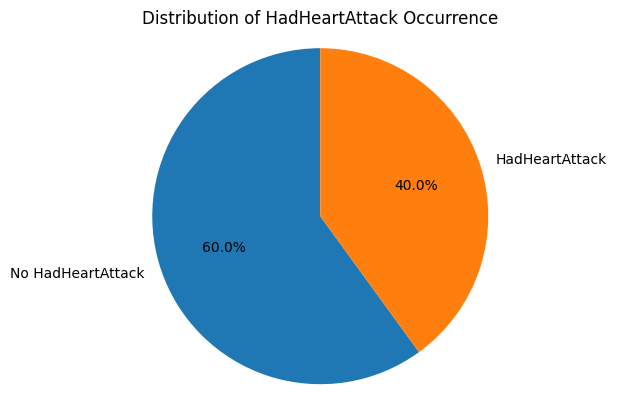

In [ ]:
# Count the number of instances for each class
HadHeartAttack_counts = balanced_sample['HadHeartAttack'].value_counts()

# Create a pie chart
plt.pie(HadHeartAttack_counts, labels=['No HadHeartAttack', 'HadHeartAttack'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of HadHeartAttack Occurrence')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

This pie chart represents the distribution of occurrences of "HadHeartAttack." The chart is divided into two segments

The orange segment represents the portion of individuals who had a heart attack, making up 40% of the total population in the dataset.
The blue segment represents the portion of individuals who did not have a heart attack, comprising 60% of the population.
The chart visually shows that a larger percentage of people did not experience a heart attack compared to those who did.

##Remove Duplicates

To make sure there are no duplicate rows in the data, which is regarded as a process of cleaning the data.

In [ ]:
# remove duplicates row
balanced_sample= balanced_sample.drop_duplicates()

print("DataFrame after removing duplicates:")
print(balanced_sample)

DataFrame after removing duplicates:
                State     Sex GeneralHealth  PhysicalHealthDays  \
418923  West Virginia    Male          Fair                24.0   
283046   North Dakota  Female     Very good                 0.0   
12937         Arizona    Male     Very good                 0.0   
95486           Idaho    Male     Very good                 0.0   
379670       Virginia  Female          Fair                30.0   
...               ...     ...           ...                 ...   
34786      California    Male          Good                 0.0   
289828           Ohio  Female          Good                 3.0   
43343        Colorado  Female     Very good                 0.0   
308861         Oregon  Female          Fair                25.0   
179459  Massachusetts    Male     Very good                 NaN   

        MentalHealthDays                                    LastCheckupTime  \
418923               0.0  Within past year (anytime less than 12 months ...   


#Visualizations graphs

##1. Bar Charts for Categorical Features

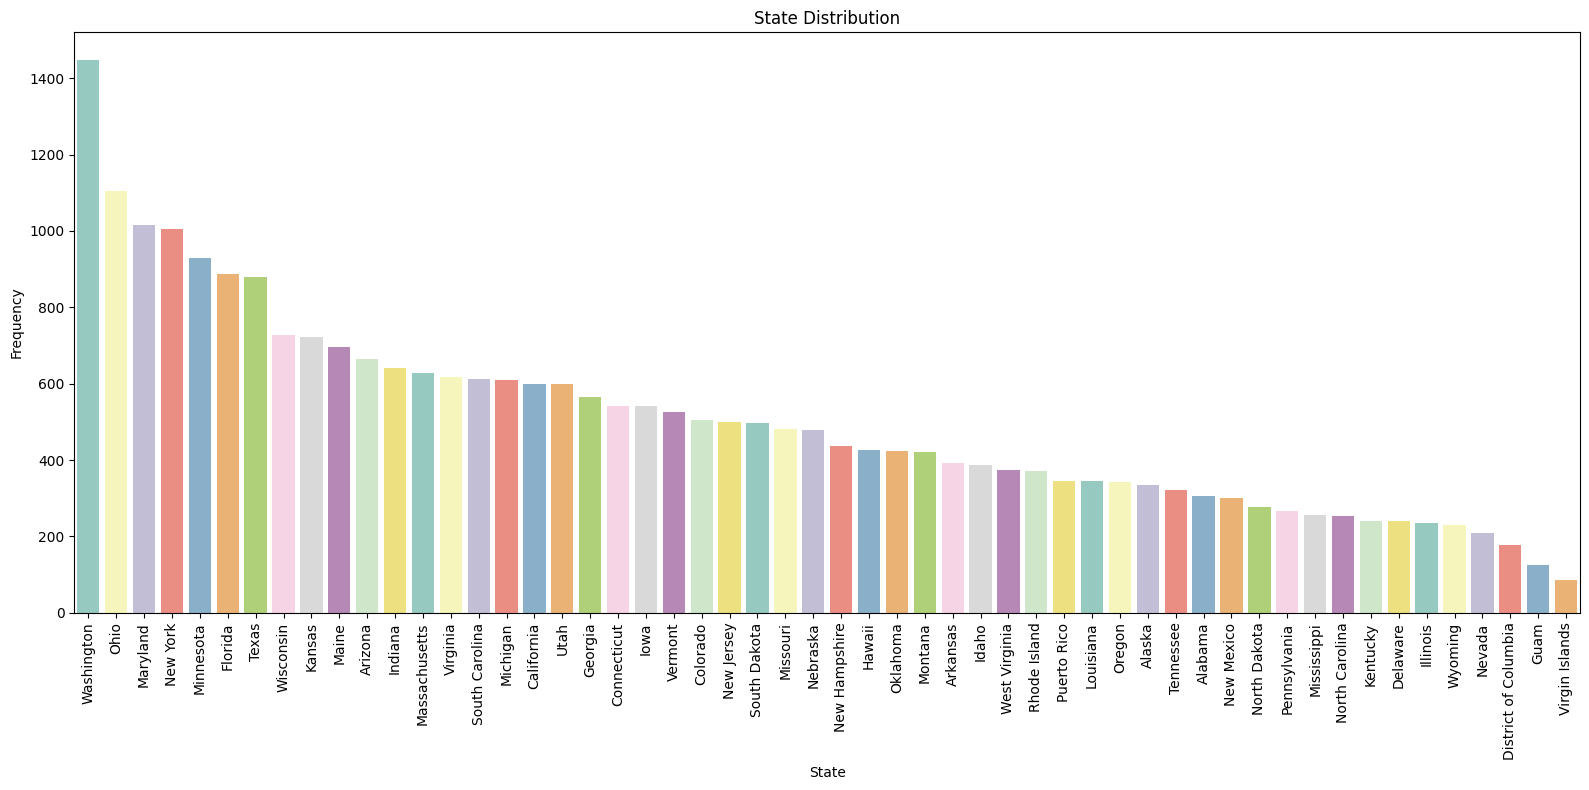

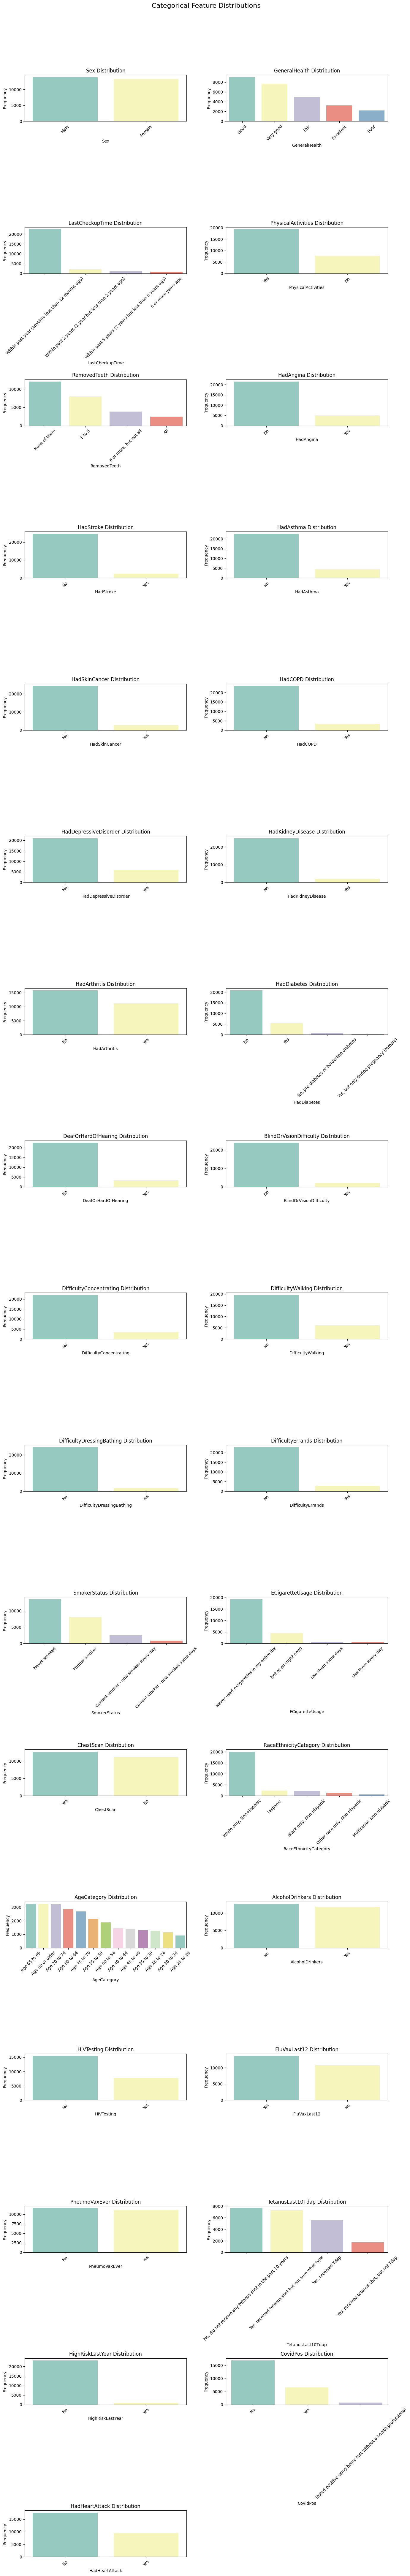

In [ ]:
# Separate categorical and numerical columns
categorical_cols = balanced_sample.select_dtypes(include=['object']).columns
numerical_cols = balanced_sample.select_dtypes(exclude=['object']).columns

# Special Plot for "State Distribution" for better readability
plt.figure(figsize=(16, 8))
sns.countplot(data=balanced_sample, x='State', order=balanced_sample['State'].value_counts().index, palette='Set3')
plt.title('State Distribution')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate labels vertically
plt.tight_layout()
plt.show()

# 1. Bar Charts for Remaining Categorical Features with 'Set3' palette
# Remove "State" from categorical columns to avoid plotting it again
remaining_categorical_cols = categorical_cols.drop('State')
num_cats = len(remaining_categorical_cols)
rows = (num_cats // 2) + (num_cats % 2 > 0)  # 2 columns
fig, axes = plt.subplots(rows, 2, figsize=(14, rows * 5))
fig.suptitle('Categorical Feature Distributions', fontsize=16, y=1.02)
axes = axes.flatten()

for i, col in enumerate(remaining_categorical_cols):
    sns.countplot(data=balanced_sample, x=col, order=balanced_sample[col].value_counts().index, palette='Set3', ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



**State Distribution:** The distribution of states varies significantly, with a few states (e.g., Washington, Ohio, Maryland, New York, Minnesota) showing high frequencies, while others (e.g., Guam, Virgin Islands, District of Columbia) have low representation. The chart is right-skewed, indicating that a small number of states have much higher counts than the rest.

**Categorical Feature Distributions:** The categorical features display distinct patterns, with some categories consistently more common. Binary features (like 'Yes' vs. 'No') often show one dominant response. Some features have balanced distributions, while others are heavily skewed. Observing the most frequent categories reveals key characteristics of the dataset, suggesting trends or tendencies within specific features.

##2. Histograms for Numerical Features


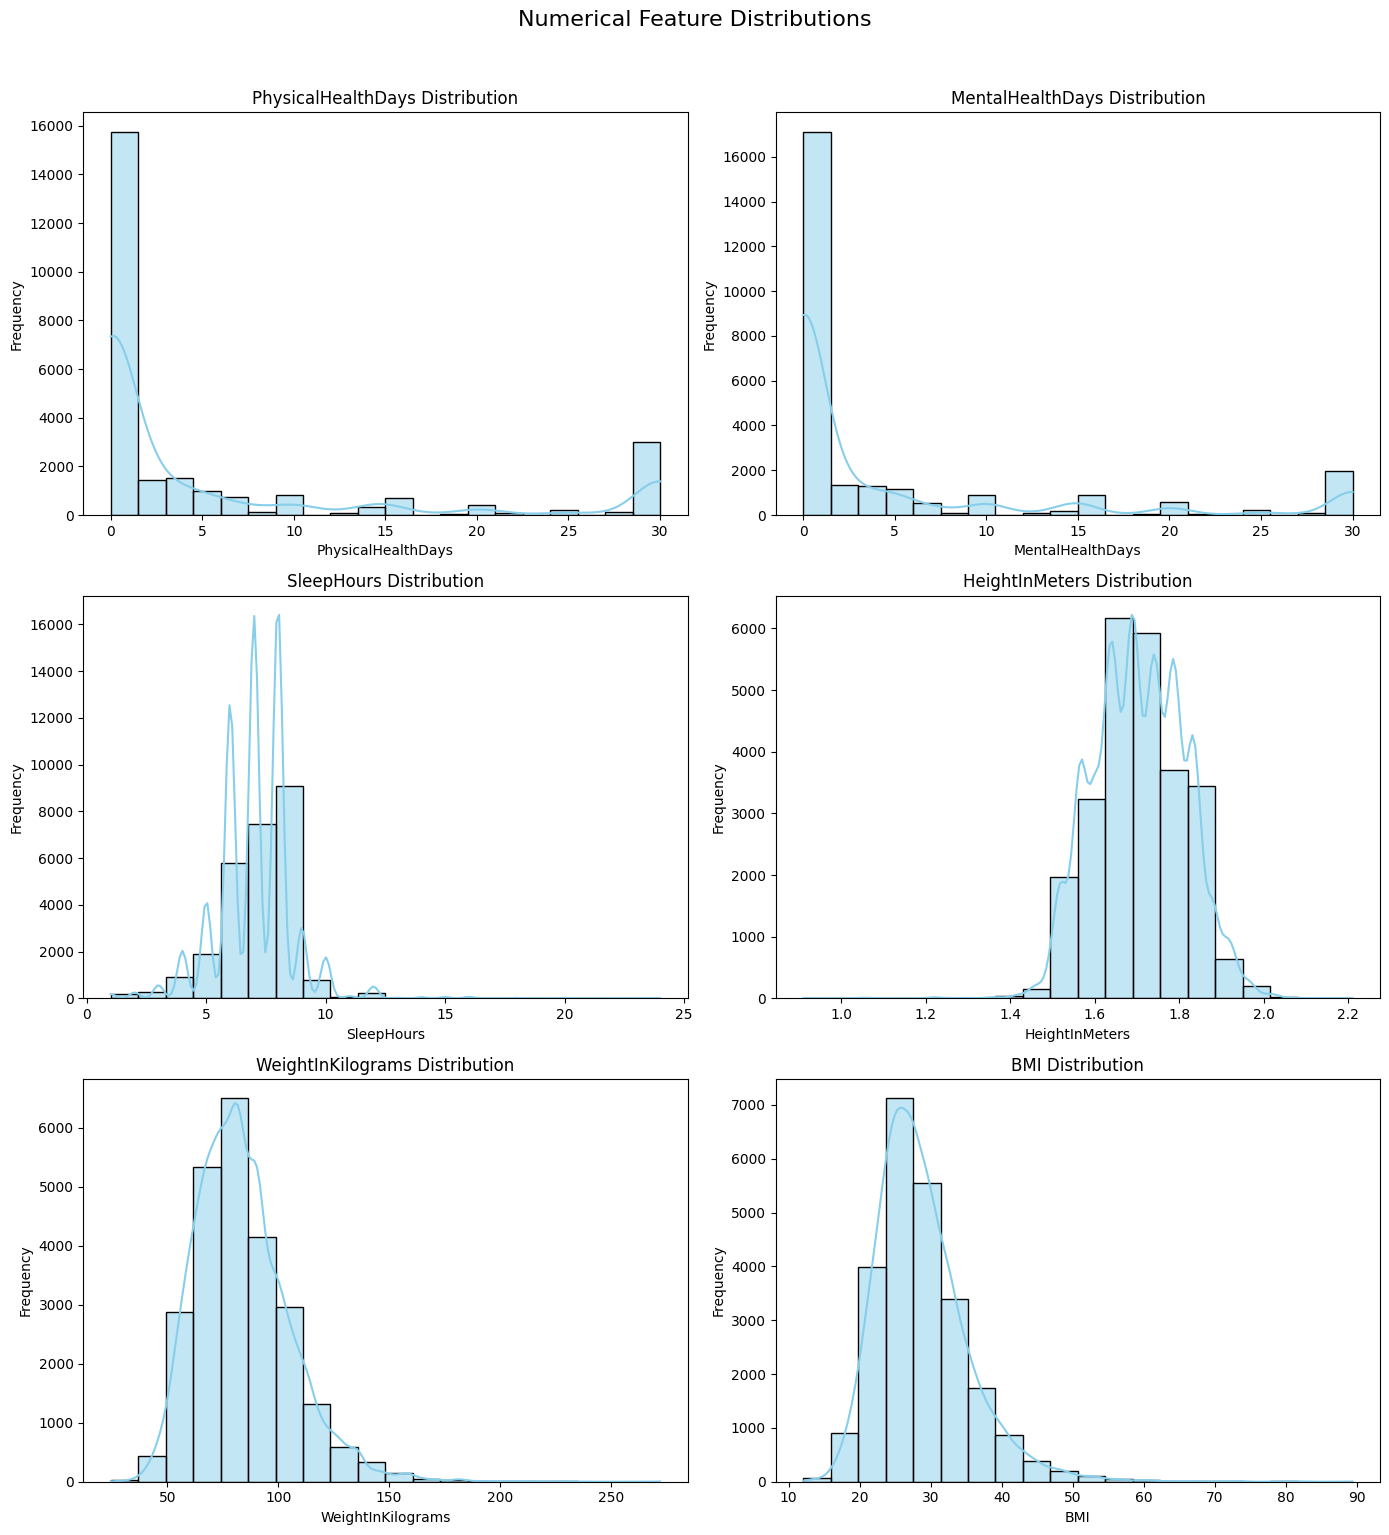

<Figure size 640x480 with 0 Axes>

In [ ]:
# 2. Histograms for Numerical Features with 'skyblue' color
num_nums = len(numerical_cols)
rows = (num_nums // 2) + (num_nums % 2 > 0)  # 2 columns
fig, axes = plt.subplots(rows, 2, figsize=(14, rows * 5))
fig.suptitle('Numerical Feature Distributions', fontsize=16, y=1.02)
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(balanced_sample[col].dropna(), bins=20, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**PhysicalHealthDays and MentalHealthDays:** Both distributions are right-skewed, with most individuals reporting low numbers of days with health issues. A small peak at 30 days in both features suggests some people experience prolonged health challenges.

**SleepHours:**This follows a roughly normal distribution, peaking around the recommended 7–8 hours of sleep. Outliers show some individuals sleep very little or a lot more.

**HeightInMeters and WeightInKilograms:** Both show relatively normal distributions. Height centers around 1.6–1.8 meters, while weight peaks at 60–80 kilograms, with a spread in higher ranges indicating diversity.

**BMI:** The BMI distribution is right-skewed, peaking in the normal range (20–30), with fewer individuals in higher BMI ranges, highlighting cases of obesity in the dataset.

##3. Heart Attack by Gender

**Bar chart showing the number of samples that had a heart attack based on their gender**

based on the barchart the number of male that had heart attack is slightly larger than the number of females


Text(0, 0.5, 'Frequency')

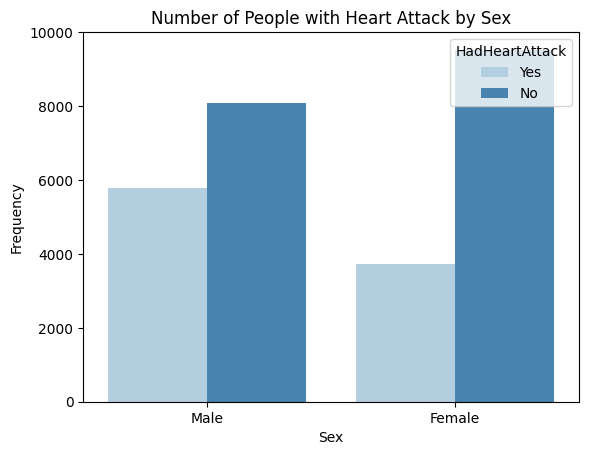

In [ ]:
sns.countplot(x='Sex', hue='HadHeartAttack', data=balanced_sample , palette="Blues")
plt.title("Number of People with Heart Attack by Sex")
plt.xlabel("Sex")
plt.ylabel("Frequency")


##4. Age Category Histogram (Heart Attack Occurrence)


**Histogram: Distribution of AgeCategory with respect to HadHeartAttack**

The histogram shows that heart attack occurrences increase with age, with the highest counts found
in age groups 70 to 74 and 65 to 69. While younger groups (ages 18 to 34) show very few heart attacks,
the proportion of heart attack cases grows significantly in older groups, particularly those aged 70 and above.
This suggests a strong correlation between age and heart attack risk, with older individuals being more susceptible.

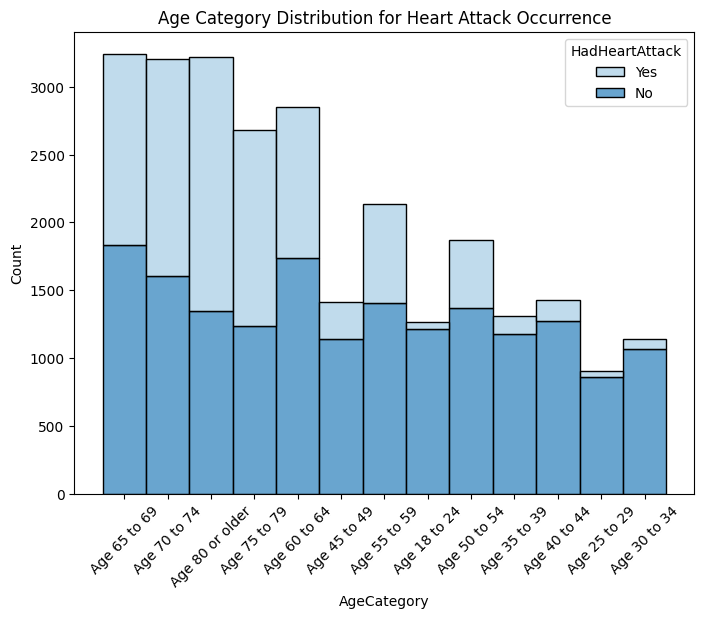

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=balanced_sample, x='AgeCategory', hue='HadHeartAttack', multiple='stack', palette='Blues')
plt.title('Age Category Distribution for Heart Attack Occurrence')
plt.xticks(rotation=45)
plt.show()


##5. Box plot: SleepHours by Heart Attack Status




This box plot compares the distribution of sleep hours between individuals who had a heart attack and those who did not.
The median and interquartile ranges (IQR) are very similar for both groups, indicating comparable central tendencies and
spread of sleep hours. There are multiple outliers in both groups, but no significant difference between the two. Overall,
the data suggests that sleep hours do not differ greatly between those who experienced a heart attack and those who did not.

Text(0, 0.5, 'Sleep Hours')

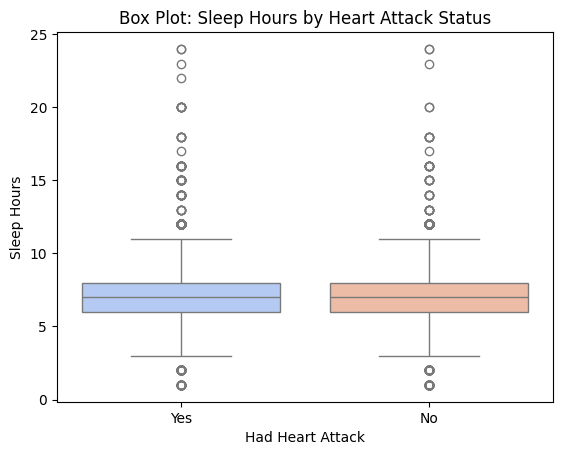

In [ ]:
sns.boxplot(x='HadHeartAttack', y='SleepHours', data=balanced_sample, palette="coolwarm")
plt.title("Box Plot: Sleep Hours by Heart Attack Status")
plt.xlabel("Had Heart Attack")
plt.ylabel("Sleep Hours")


##6. Scatter Plot BMI and Weight

The scatter plot shows a strong positive correlation between weight and BMI, indicating that as weight increases, BMI tends to increase as well. Most data points are clustered within the weight range of 50 to 150 kilograms and BMI values between 20 and 40, suggesting that these ranges are typical for the majority of the sample population.

Additionally, there are some points with particularly high weights (up to 250 kg) and BMI values (up to 100), representing less common cases in the population. The clear separation of the data points allows for an easy visualization of the trend and distribution, making the relationship between weight and BMI readily apparent.

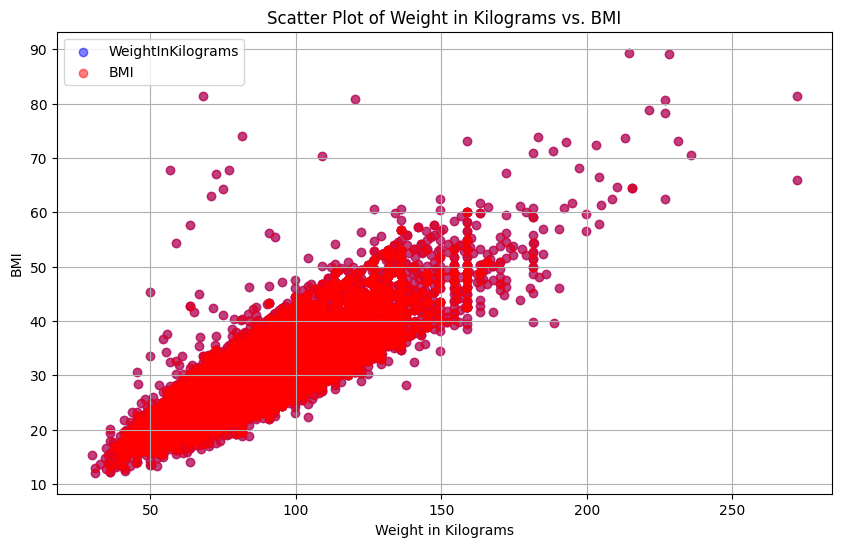

In [ ]:
balanced_sample = balanced_sample.dropna(subset=['WeightInKilograms', 'BMI'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(balanced_sample['WeightInKilograms'], balanced_sample['BMI'], c='blue', alpha=0.5, label='WeightInKilograms')
plt.scatter(balanced_sample['WeightInKilograms'], balanced_sample['BMI'], c='red', alpha=0.5, label='BMI')
plt.title('Scatter Plot of Weight in Kilograms vs. BMI')
plt.xlabel('Weight in Kilograms')
plt.ylabel('BMI')
plt.legend()
plt.grid(True)
plt.show()


##7. Correlation Heatmap

The dataset shows logical correlations, such as those between weight and BMI or height and weight.
Mental and physical health days have a moderate relationship, suggesting a possible interplay between mental and physical well-being.
Other correlations are weak, indicating that many of these variables do not strongly influence each other.
This heatmap serves as a useful tool to identify potential variables for further analysis, particularly focusing on the strong correlations that could impact health-related outcomes.


Correlation Matrix:
                     PhysicalHealthDays  MentalHealthDays  SleepHours  \
PhysicalHealthDays            1.000000          0.343103   -0.065359   
MentalHealthDays              0.343103          1.000000   -0.122726   
SleepHours                   -0.065359         -0.122726    1.000000   
HeightInMeters               -0.032235         -0.044248    0.004282   
WeightInKilograms             0.078084          0.035583   -0.034443   
BMI                           0.108877          0.068107   -0.042471   

                    HeightInMeters  WeightInKilograms       BMI  
PhysicalHealthDays       -0.032235           0.078084  0.108877  
MentalHealthDays         -0.044248           0.035583  0.068107  
SleepHours                0.004282          -0.034443 -0.042471  
HeightInMeters            1.000000           0.480033 -0.026977  
WeightInKilograms         0.480033           1.000000  0.854514  
BMI                      -0.026977           0.854514  1.000000  


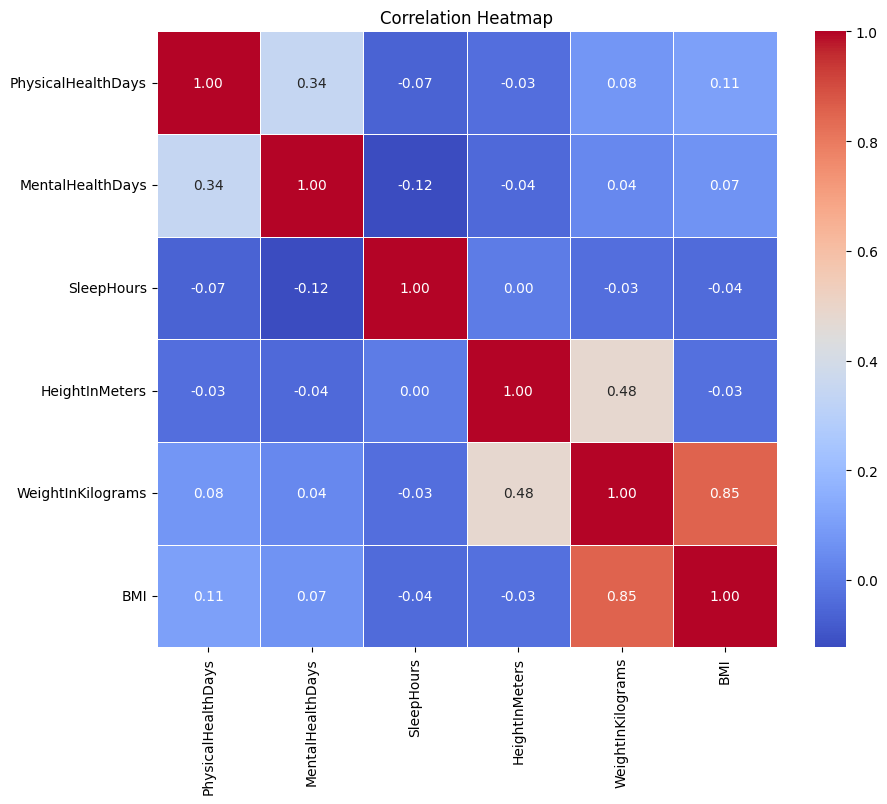

In [ ]:
# Ensure 'WeightInKilograms' and 'BMI' are numeric
balanced_sample['WeightInKilograms'] = pd.to_numeric(balanced_sample['WeightInKilograms'], errors='coerce')
balanced_sample['BMI'] = pd.to_numeric(balanced_sample['BMI'], errors='coerce')

# Select only numeric columns for the correlation matrix
numeric_columns = balanced_sample.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric crrumns
correlation_matrix = numeric_columns.corr()

# Print the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()


---
#Handling Missing Data


##Checking for Missing Values


In [ ]:
#check for missing values in the entire dataset
missing_values=balanced_sample.isna().sum()

print("Missing values in each column:")
print(missing_values)

print("\nTotal number of missing values in the dataset:", missing_values.sum())

Missing values in each column:
State                           0
Sex                             0
GeneralHealth                  69
PhysicalHealthDays            652
MentalHealthDays              551
LastCheckupTime               380
PhysicalActivities             51
SleepHours                    276
RemovedTeeth                  651
HadAngina                     530
HadStroke                      96
HadAsthma                      86
HadSkinCancer                 210
HadCOPD                       128
HadDepressiveDisorder         140
HadKidneyDisease              136
HadArthritis                  119
HadDiabetes                    58
DeafOrHardOfHearing           195
BlindOrVisionDifficulty       220
DifficultyConcentrating       361
DifficultyWalking             335
DifficultyDressingBathing     316
DifficultyErrands             405
SmokerStatus                  921
ECigaretteUsage               941
ChestScan                    2082
RaceEthnicityCategory         650
AgeCategory      

The dataset contains 25,887 missing values in total across various columns.

Some columns, such as'TetanusLast10Tdap', 'PneumoVaxEver', and 'ChestScan', have a significantly large number of missing values, while others like 'State' and 'Sex' have no missing values. This indicates a need for further preprocessing to handle these missing values.

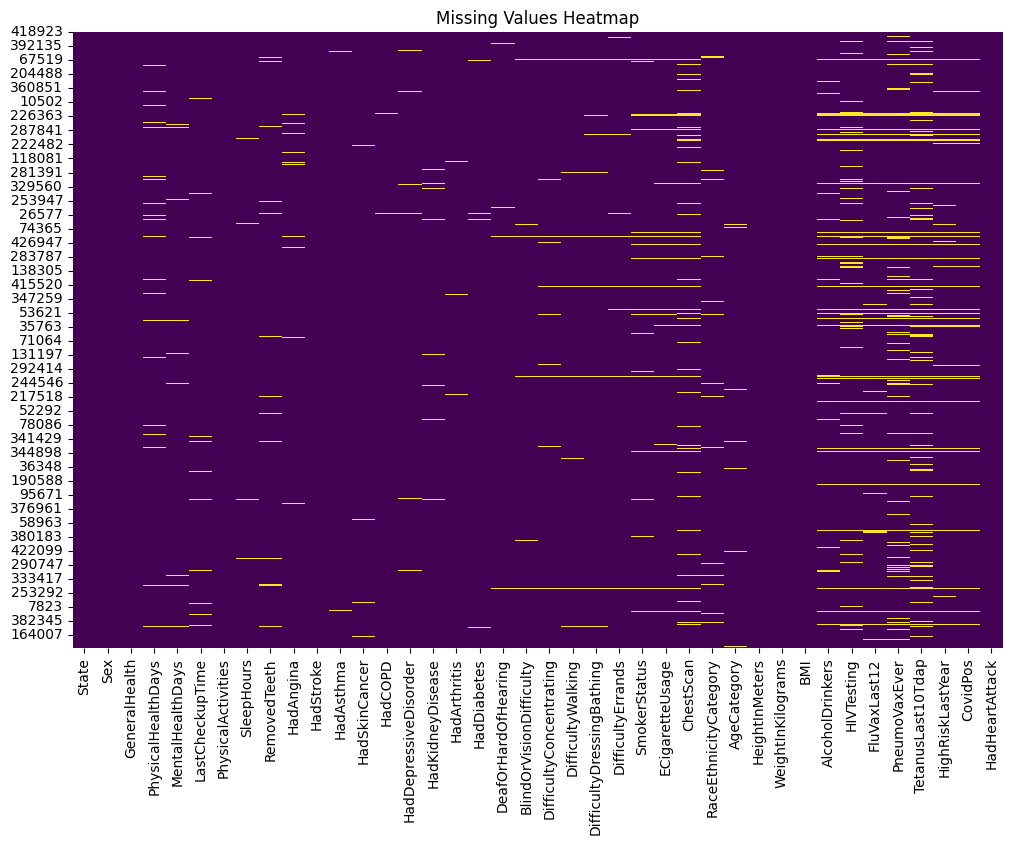

Missing values by column:
 TetanusLast10Tdap            3507
PneumoVaxEver                3007
HIVTesting                   2675
ChestScan                    2082
HighRiskLastYear             1738
CovidPos                     1737
FluVaxLast12                 1513
AlcoholDrinkers              1483
ECigaretteUsage               941
SmokerStatus                  921
PhysicalHealthDays            652
RemovedTeeth                  651
RaceEthnicityCategory         650
MentalHealthDays              551
HadAngina                     530
DifficultyErrands             405
LastCheckupTime               380
DifficultyConcentrating       361
DifficultyWalking             335
DifficultyDressingBathing     316
SleepHours                    276
AgeCategory                   249
BlindOrVisionDifficulty       220
HadSkinCancer                 210
DeafOrHardOfHearing           195
HadDepressiveDisorder         140
HadKidneyDisease              136
HadCOPD                       128
HadArthritis         

In [ ]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # Enable iterative imputer for MICE
from sklearn.impute import IterativeImputer

# Visualize missing data heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(balanced_sample.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Summary of missing values by column
missing_summary = balanced_sample.isnull().sum().sort_values(ascending=False)
print("Missing values by column:\n", missing_summary)

# Set a threshold for columns to drop if missing values are very high (e.g., >50%)
threshold = 0.5 * len(balanced_sample)
columns_to_drop = missing_summary[missing_summary > threshold].index
balanced_sample.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped columns with more than 50% missing values: {list(columns_to_drop)}")

# Define columns based on data types and importance
numeric_cols = balanced_sample.select_dtypes(include=[np.number]).columns
categorical_cols = balanced_sample.select_dtypes(include=['object']).columns

# Impute numerical data with different methods based on variance
# Impute low-variance columns with mean and high-variance columns with median
low_variance_cols = [col for col in numeric_cols if balanced_sample[col].var() < 10]
high_variance_cols = [col for col in numeric_cols if balanced_sample[col].var() >= 10]

# Mean imputation for low variance columns
mean_imputer = SimpleImputer(strategy='mean')
balanced_sample[low_variance_cols] = mean_imputer.fit_transform(balanced_sample[low_variance_cols])

# Median imputation for high variance columns
median_imputer = SimpleImputer(strategy='median')
balanced_sample[high_variance_cols] = median_imputer.fit_transform(balanced_sample[high_variance_cols])

# KNN Imputation for certain numeric columns where relationships with other variables are important
# E.g., if you want to impute based on neighbors for complex columns like 'BMI', 'WeightInKilograms'
knn_imputer = KNNImputer(n_neighbors=5)
knn_cols = ['BMI', 'WeightInKilograms']  # Define columns suitable for KNN
balanced_sample[knn_cols] = knn_imputer.fit_transform(balanced_sample[knn_cols])

# Impute categorical columns
# Use mode imputation for common categorical columns, replace with 'Unknown' for high-missing-rate columns
mode_imputer = SimpleImputer(strategy='most_frequent')
high_missing_categorical = ['LastCheckupTime', 'RemovedTeeth']
balanced_sample[high_missing_categorical] = balanced_sample[high_missing_categorical].fillna('Unknown')
balanced_sample[categorical_cols.difference(high_missing_categorical)] = mode_imputer.fit_transform(
    balanced_sample[categorical_cols.difference(high_missing_categorical)]
)

# Multiple Imputation by Chained Equations (MICE) for crucial features
mice_imputer = IterativeImputer(max_iter=10, random_state=0)
mice_cols = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']
balanced_sample[mice_cols] = mice_imputer.fit_transform(balanced_sample[mice_cols])

# Verify remaining missing values
print("Remaining missing values by column:\n", balanced_sample.isnull().sum())

##Statistecal Summaries

The mean, median, mode, and variance have been calculated for all numeric columns in the dataset.

From the mean and median values, we can infer the central tendency of the data for each variable.

The mode shows the most frequent values, and the variance highlights how much the data is spread out from the mean.

'PhysicalHealthDays' and 'MentalHealthDays' show higher variance compared to other features, indicating more variability.

Other columns like 'SleepHours', 'HeightInMeters', and 'BMI' have lower variance, meaning the values are more consistent across records.

In [ ]:
# Select only numeric columns
numeric_balanced_sample = balanced_sample. select_dtypes (include= [np. number ])
# Calculate and display summary statistics
mean_values = numeric_balanced_sample.mean()
median_values = numeric_balanced_sample. median ()
mode_values = numeric_balanced_sample.mode().iloc[0]
variance_values = numeric_balanced_sample.var ()

print("Mean values: \n", mean_values)
print("\nMedian values: \n", median_values)
print("\nMode values: \n", mode_values)
print("\nVariance values: \n", variance_values)

Mean values: 
 PhysicalHealthDays     5.701945
MentalHealthDays       4.557707
SleepHours             7.032672
HeightInMeters         1.707236
WeightInKilograms     84.104961
BMI                   28.760705
dtype: float64

Median values: 
 PhysicalHealthDays     0.00
MentalHealthDays       0.00
SleepHours             7.00
HeightInMeters         1.70
WeightInKilograms     81.65
BMI                   27.71
dtype: float64

Mode values: 
 PhysicalHealthDays     0.00
MentalHealthDays       0.00
SleepHours             8.00
HeightInMeters         1.78
WeightInKilograms     90.72
BMI                   26.63
Name: 0, dtype: float64

Variance values: 
 PhysicalHealthDays     98.843603
MentalHealthDays       76.398825
SleepHours              2.494400
HeightInMeters          0.011677
WeightInKilograms     464.200769
BMI                    42.901960
dtype: float64


##Z-score and Outliers

Z_score:
We use **MentalHealthDays** to get the z-score. In order to determine the z-score, we first took a sample of 30% of the data and then computed the sample mean and standard deviation.as you can see.


In [ ]:
# Choose a specific column for analysis
column_name = 'MentalHealthDays'

# Check if the column exists in the DataFrame
if column_name in balanced_sample.columns:
    # Check if the column has numeric data (if applicable)
    if pd.api.types.is_numeric_dtype(balanced_sample[column_name]):


        # Randomly sample values from the chosen column
        sampled_values = balanced_sample[column_name]

        # Display the sampled values
        print("Sampled Values:")
        print(sampled_values)

        # Calculate the mean and standard deviation of the sample, ignoring NaNs
        mean = np.nanmean(sampled_values)
        std_dev = np.nanstd(sampled_values)

        # Calculate z-scores
        z_scores = (sampled_values - mean) / std_dev

        # Combine sampled values with their z-scores for display
        result_balanced_sample = pd.DataFrame({'Sample Values': sampled_values, 'Z-Scores': z_scores})

        # Detect outliers (z-score > 3)
        outliers = result_balanced_sample[result_balanced_sample['Z-Scores'].abs() > 3]

        # Display the outliers
        print("Outliers:")
        print(outliers)

    else:
        print(f"The column '{column_name}' exists but does not contain numeric data.")
else:
    print(f"The column '{column_name}' does not exist in the DataFrame.")

Sampled Values:
418923     0.0
283046     0.0
12937      0.0
95486      0.0
379670     0.0
          ... 
34786      0.0
289828    25.0
43343      0.0
308861    15.0
179459     0.0
Name: MentalHealthDays, Length: 24425, dtype: float64
Outliers:
Empty DataFrame
Columns: [Sample Values, Z-Scores]
Index: []


##Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


# Identify categorical columns
categorical_columns = balanced_sample.select_dtypes(include=['object']).columns

# Apply LabelEncoder to all categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    balanced_sample[col] = label_encoder.fit_transform(balanced_sample[col].astype(str))

# Save the encoded data if needed
print(balanced_sample.head())


        State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
418923     51    1              1                24.0               0.0   
283046     35    0              4                 0.0               0.0   
12937       2    1              4                 0.0               0.0   
95486      13    1              4                 0.0               0.0   
379670     49    0              1                30.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
418923                4                   0         6.0             2   
283046                4                   1         7.0             3   
12937                 4                   0         7.0             0   
95486                 4                   1         7.0             0   
379670                4                   0         6.0             2   

        HadAngina  ...  WeightInKilograms    BMI  AlcoholDrinkers  HIVTesting  \
418923          1  ...       

##Normalization


Here’s the normalization, and we chose these columns to normalize for the following reasons:

- **PhysicalHealthDays & MentalHealthDays**: Their value ranges may differ, which is especially important for distance-based algorithms.
  
- **SleepHours**: Sleep hours can vary greatly, and normalization helps avoid bias in the model by treating all inputs equally.
  
- **HeightInMeters**: Height values can differ significantly and may be undervalued without normalization.

- **WeightInKilograms**: Normalization prevents weight, which can vary widely, from overshadowing smaller features, ensuring an equitable influence on outcomes.

- **BMI**: Since BMI is derived from weight and height, normalizing it helps align its scale with other features for enhanced model accuracy.

we used the min-max normalization because it preserves the relationships between data points. The normalized values maintain their relative differences.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = [
    'PhysicalHealthDays', 'MentalHealthDays', 'HeightInMeters', 'WeightInKilograms','BMI'
]
data_to_normalize = balanced_sample[columns_to_normalize]
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)
balanced_sample[columns_to_normalize] = normalized_data_minmax
print("Min-Max scaled data:")
print(balanced_sample.head())


Min-Max scaled data:
        State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
418923     51    1              1                 0.8               0.0   
283046     35    0              4                 0.0               0.0   
12937       2    1              4                 0.0               0.0   
95486      13    1              4                 0.0               0.0   
379670     49    0              1                 1.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
418923                4                   0         6.0             2   
283046                4                   1         7.0             3   
12937                 4                   0         7.0             0   
95486                 4                   1         7.0             0   
379670                4                   0         6.0             2   

        HadAngina  ...  WeightInKilograms       BMI  AlcoholDrinkers  \
418923          1

##Discretization

Discretization is the process of converting continuous numerical data into a set of discrete categories or intervals. This can make data easier to analyze and interpret by grouping similar values together. For example, instead of analyzing individual sleep hours, we can group people into broader categories of sleep duration, such as "<5 hours" or "7-8 hours."



In [ ]:
# Discretize the 'SleepHours' column by categorizing into defined ranges
# Categories: <5 hours, 5-6 hours, 7-8 hours, 9+ hours

# Define the bins and labels for discretization
sleep_bins = [0, 5, 7, 9, float('inf')]
sleep_labels = ['<5 hours', '5-6 hours', '7-8 hours', '9+ hours']

# Apply discretization to create a new categorical column
balanced_sample['SleepHours_Category'] = pd.cut(balanced_sample['SleepHours'], bins=sleep_bins, labels=sleep_labels)


# Define a mapping dictionary for the categories
sleep_hours_mapping = {
    '<5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    '9+ hours': 3
}

# Use map to encode 'SleepHours_Category'
balanced_sample['SleepHours_Category_encoded'] = balanced_sample['SleepHours_Category'].map(sleep_hours_mapping)

# Display the distribution of the new 'SleepHours_Category' column
print(balanced_sample['SleepHours_Category'].value_counts())

# Display the DataFrame to confirm the changes
print(balanced_sample[['SleepHours_Category_encoded']].head(10))





SleepHours_Category
5-6 hours    11987
7-8 hours     8434
<5 hours      2929
9+ hours      1075
Name: count, dtype: int64
       SleepHours_Category_encoded
418923                           1
283046                           1
12937                            1
95486                            1
379670                           1
214702                           1
200783                           0
389797                           2
111730                           2
298791                           1


In [ ]:
balanced_sample = balanced_sample.drop(columns=['SleepHours'])
balanced_sample = balanced_sample.drop(columns=['SleepHours_Category'])
balanced_sample = balanced_sample.rename(columns={'SleepHours_Category_encoded':'SleepHours'})

In [ ]:
class_label = balanced_sample['HadHeartAttack']
balanced_sample = balanced_sample.drop(columns=['HadHeartAttack'])
balanced_sample['HadHeartAttack'] = class_label

This code simplifies the dataset by dropping the original SleepHours and SleepHours_Category columns, leaving only the encoded SleepHours data to reduce redundancy. It then renames SleepHours_Category_encoded to SleepHours for clarity and moves the HadHeartAttack column to the end to ensure the target variable is last.

---
#Feature Selection

**Featuer selection:**

*   **Data Preprocessing:** The code prepares the dataset for analysis by ensuring all necessary numeric and categorical columns are present.

*   **Correlation Calculation:** It calculates correlation coefficients among numeric features to identify relationships, helping to spot redundant variables.



*   **Chi-Square Tests:** The code performs chi-square tests to assess the relationship between categorical variables and the outcome (HadHeartAttack), revealing significant associations.

*   **Removing Correlated Features:** Highly correlated features are identified and removed to prevent multicollinearity, which can affect model performance and interpretability.


*   **Improving Data Quality:** These steps enhance the dataset's
quality, making it cleaner and more relevant for analysis.
















In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


##Correlation Calculation


In [ ]:

#following columns are numeric
numeric_columns = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
                   'HeightInMeters', 'WeightInKilograms', 'BMI']

# Check if these columns exist in the DataFrame
for col in numeric_columns:
    if col not in df.columns:
        print(f"Column '{col}' not found in DataFrame.")

# Calculate and print correlation coefficients
correlations = {}
for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        col1 = numeric_columns[i]
        col2 = numeric_columns[j]
        correlation = df[col1].corr(df[col2])
        correlations[f'{col1} & {col2}'] = correlation

print("Correlation coefficients:")
for key, value in correlations.items():
    print(f"{key}: {value}")

Correlation coefficients:
PhysicalHealthDays & MentalHealthDays: 0.32134945368605417
PhysicalHealthDays & SleepHours: -0.05590583062598445
PhysicalHealthDays & HeightInMeters: -0.05086687595807942
PhysicalHealthDays & WeightInKilograms: 0.07283840982903343
PhysicalHealthDays & BMI: 0.11286486610287931
MentalHealthDays & SleepHours: -0.12907501624618947
MentalHealthDays & HeightInMeters: -0.049473154139839694
MentalHealthDays & WeightInKilograms: 0.04034541818391297
MentalHealthDays & BMI: 0.07589101481866424
SleepHours & HeightInMeters: -0.014668028946195361
SleepHours & WeightInKilograms: -0.05352128241792297
SleepHours & BMI: -0.05080531977201027
HeightInMeters & WeightInKilograms: 0.4678924271904
HeightInMeters & BMI: -0.028348528620764535
WeightInKilograms & BMI: 0.8595574121529911


##Chi-Square

In [ ]:

from scipy.stats import chi2_contingency
import pandas as pd

# Sample DataFrame (replace with your actual data)
# df = pd.read_csv('your_file.csv')

print("Column Names in DataFrame:")
print(df.columns.tolist())

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

# Proceed with the chi-square test after confirming the column names
categorical_columns = [
    'State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
    'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
    'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
    'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
    'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'
]

# Verify if the columns exist in the DataFrame
for column in categorical_columns:
    if column not in df.columns:
        print(f"Column '{column}' not found in DataFrame.")

# Perform chi-square tests and store results
results = {}
features_to_remove = set()  # To track features marked for removal due to dependency

# Perform Chi-Square tests between each categorical column and 'HadHeartAttack'
for i, column in enumerate(categorical_columns):
    if column in df.columns:
        # Create the contingency table between the current categorical column and 'HadHeartAttack'
        contingency_table = pd.crosstab(df[column], df['HadHeartAttack'])

        # Perform the Chi-Square test
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

        # Store the results of the Chi-Square test
        results[column] = {
            'Chi-Square Statistic': chi2_stat,
            'P-Value': p_value,
            'Degrees of Freedom': dof,
            'Expected Frequencies': expected
        }

        # If the p-value is less than 0.05, the feature is dependent on 'HadHeartAttack'
        if p_value < 0.05:
            print(f"\nDependent variables detected: {column} and 'HadHeartAttack' (p-value = {p_value})")

            # To avoid removing both features, we remove only one (the one that comes later in the list)
            if column not in features_to_remove:
                # Remove the feature later in the list (the current one)
                features_to_remove.add(categorical_columns[i])  # Remove the current dependent feature

# Now, we remove the dependent categorical features identified
df_filtered = df.drop(columns=features_to_remove)

# Show the columns that were removed due to dependency
print("\nColumns identified for removal due to dependency (only categorical features):")
print(features_to_remove)

# Print the first few rows of the filtered dataframe
print("\nFiltered DataFrame after removing dependent categorical features:")
print(df_filtered.head())



Column Names in DataFrame:
['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'HadHeartAttack']

Dependent variables detected: State and 'HadHeartAttack' (p-value = 6.79759112778233e-182)

Dependent variables detected: Sex and 'HadHeartAttack' (p-value = 0.0)

Dependent variables detected: GeneralHealth and 'HadHeartAttack' (p-value = 0.0)

Dependent variabl

In [ ]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Set the threshold for correlation
correlation_threshold = 0.75

# Find highly correlated pairs
highly_correlated_pairs = np.where(np.abs(correlation_matrix) >= correlation_threshold)
attributes_to_remove = set()

# Loop through all pairs of highly correlated columns
for i, j in zip(*highly_correlated_pairs):
    if i != j:
        attribute_i = df_encoded.columns[i]
        attribute_j = df_encoded.columns[j]

        # If neither of the attributes is in the removal set, add one to the removal set
        if attribute_i not in attributes_to_remove and attribute_j not in attributes_to_remove:
            attributes_to_remove.add(attribute_j)  # You can decide which one to drop, here I chose attribute_j

# Remove the highly correlated attributes
df_filtered = df_encoded.drop(columns=attributes_to_remove)

print("\nDataFrame after removing highly correlated attributes:")
print(df_filtered.head())



DataFrame after removing highly correlated attributes:
   PhysicalHealthDays  MentalHealthDays  SleepHours  HeightInMeters  \
0                 0.0               0.0         8.0             NaN   
1                 0.0               0.0         6.0            1.60   
2                 2.0               3.0         5.0            1.57   
3                 0.0               0.0         7.0            1.65   
4                 2.0               0.0         9.0            1.57   

   WeightInKilograms  State_Alaska  State_Arizona  State_Arkansas  \
0                NaN         False          False           False   
1              68.04         False          False           False   
2              63.50         False          False           False   
3              63.50         False          False           False   
4              53.98         False          False           False   

   State_California  State_Colorado  ...  HIVTesting_Yes  FluVaxLast12_Yes  \
0             False     

In [ ]:
print(attributes_to_remove)

{'BMI'}


In [ ]:
balanced_sample = balanced_sample.drop(columns=['BMI'])

In [ ]:
from sklearn.preprocessing import StandardScaler


# Define the columns to drop
columns_to_drop = [
    'State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
    'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
    'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
    'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
    'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'
]

# Drop the specified columns from the DataFrame
balanced_sample = balanced_sample.drop(columns=columns_to_drop)

# Identify numeric columns
numeric_balanced_sample = balanced_sample.select_dtypes(include=[np.number])  # Only keep numeric columns

# If you want to handle categorical columns as well, you can use:
# features = pd.get_dummies(features, drop_first=True)  # One-hot encoding for categorical columns

# Standardize the numeric features
scaler = StandardScaler()
scaled_balanced_sample = scaler.fit_transform(numeric_balanced_sample)

# Create a DataFrame for scaled features
scaled_data = pd.DataFrame(scaled_balanced_sample, columns=numeric_balanced_sample.columns)
print(scaled_data.head())

   PhysicalHealthDays  MentalHealthDays  RemovedTeeth  HeightInMeters  \
0            1.840516         -0.521449      0.182782        0.395744   
1           -0.573532         -0.521449      0.924756       -0.252053   
2           -0.573532         -0.521449     -1.301165        0.210660   
3           -0.573532         -0.521449     -1.301165        0.210660   
4            2.444028         -0.521449      0.182782        0.210660   

   WeightInKilograms  HadHeartAttack  
0           1.886065        1.343223  
1           0.201674        1.343223  
2           1.148999        1.343223  
3           0.370159        1.343223  
4          -0.703414        1.343223  


In [ ]:
print(balanced_sample)

        PhysicalHealthDays  MentalHealthDays  RemovedTeeth  HeightInMeters  \
418923            0.800000          0.000000             2        0.646154   
283046            0.000000          0.000000             3        0.592308   
12937             0.000000          0.000000             0        0.630769   
95486             0.000000          0.000000             0        0.630769   
379670            1.000000          0.000000             2        0.630769   
...                    ...               ...           ...             ...   
34786             0.000000          0.000000             3        0.646154   
289828            0.100000          0.833333             3        0.592308   
43343             0.000000          0.000000             0        0.553846   
308861            0.833333          0.500000             0        0.553846   
179459            0.000000          0.000000             0        0.723077   

        WeightInKilograms SleepHours  HadHeartAttack  
418923  

We saved the cleaned and processed dataset to a CSV file named Processed_dataset.csv. This allows us to easily access and use the prepared data

In [ ]:
balanced_sample.to_csv('Processed_dataset.csv', index=False)


#Phase 3

In [ ]:
# Load the processed dataset
pre_processed = pd.read_csv('/content/Processed_dataset.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
%pip install kneed
from kneed import KneeLocator

#Classification

We trained Decision Tree classifiers using (entropy and Gini index) attribute selection measures, across varying data partition sizes.

The partition sizes tested were:

- 70% Training and 30% Test
- 80% Training and 20% Test
- 60% Training and 40% Test

In [ ]:
fn = pre_processed.keys().tolist() [:-1]

# Define target and features
X = pre_processed[fn]
y = pre_processed['HadHeartAttack']

#**Gini**

##Split 80% 20%

In [ ]:
# First split: 20-80 split ratio, Gini criterion
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)
clf8020g = DecisionTreeClassifier(random_state=42)
clf8020g= clf8020g.fit(X_train_80, y_train_80)
y_pred_gini = clf8020g.predict(X_test_20)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test_20, y_pred_gini)
print("Accuracy:", accuracy)

Accuracy: 0.629682702149437


**Accuracy:**
The model achieves an accuracy of 62.97%, which means approximately 63% of predictions are correct. While this is above random guessing (50%), it indicates room for improvement in predictive performance.

[[2312  797]
 [1012  764]]


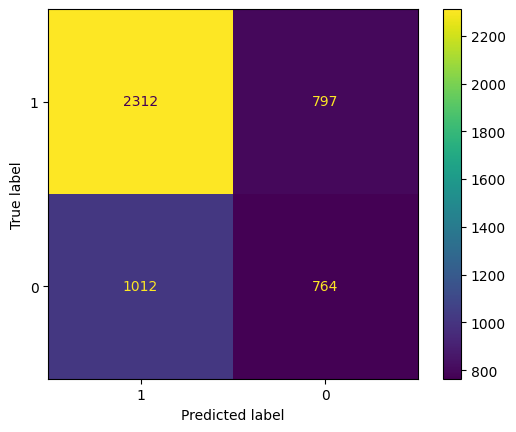

In [ ]:
cm = confusion_matrix(y_test_20, y_pred_gini)
print(cm)

cn=pre_processed['HadHeartAttack'].unique() #classes_names

disp = ConfusionMatrixDisplay.from_estimator(clf8020g, X_test_20, y_test_20, display_labels=cn)

-True Negatives (2312): The model correctly predicted 2312 individuals without heart attacks.

-False Positives (797): It incorrectly predicted heart attacks for 797 individuals who did not have one.

-False Negatives (1012): It failed to predict heart attacks for 1012 individuals who actually had one.

-True Positives (764): It successfully predicted heart attacks for 764 individuals.


In [ ]:
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)


Error Rate: 0.370317297850563
Sensitivity: 0.43018018018018017
Specificity: 0.7436474750723705
Precision: 0.4894298526585522


**Error Rate:**
The error rate of 37.03% indicates that more than one-third of predictions are incorrect, demonstrating limitations in the model's overall classification ability.

**Sensitivity (Recall):**
At 43.02%, the model identifies fewer than half of the actual heart attack cases, meaning a significant number of positive cases are missed. This could have serious implications in a real-world healthcare setting.

**Specificity:**
Specificity of 74.36% shows that the model is better at identifying individuals without heart attacks. This suggests that it performs well in reducing false alarms for negative cases.

**Precision:**
Precision of 48.94% indicates that about half of the individuals predicted to have a heart attack actually do, reflecting moderate reliability for positive predictions.

**Observation:**
The model prioritizes specificity over sensitivity.

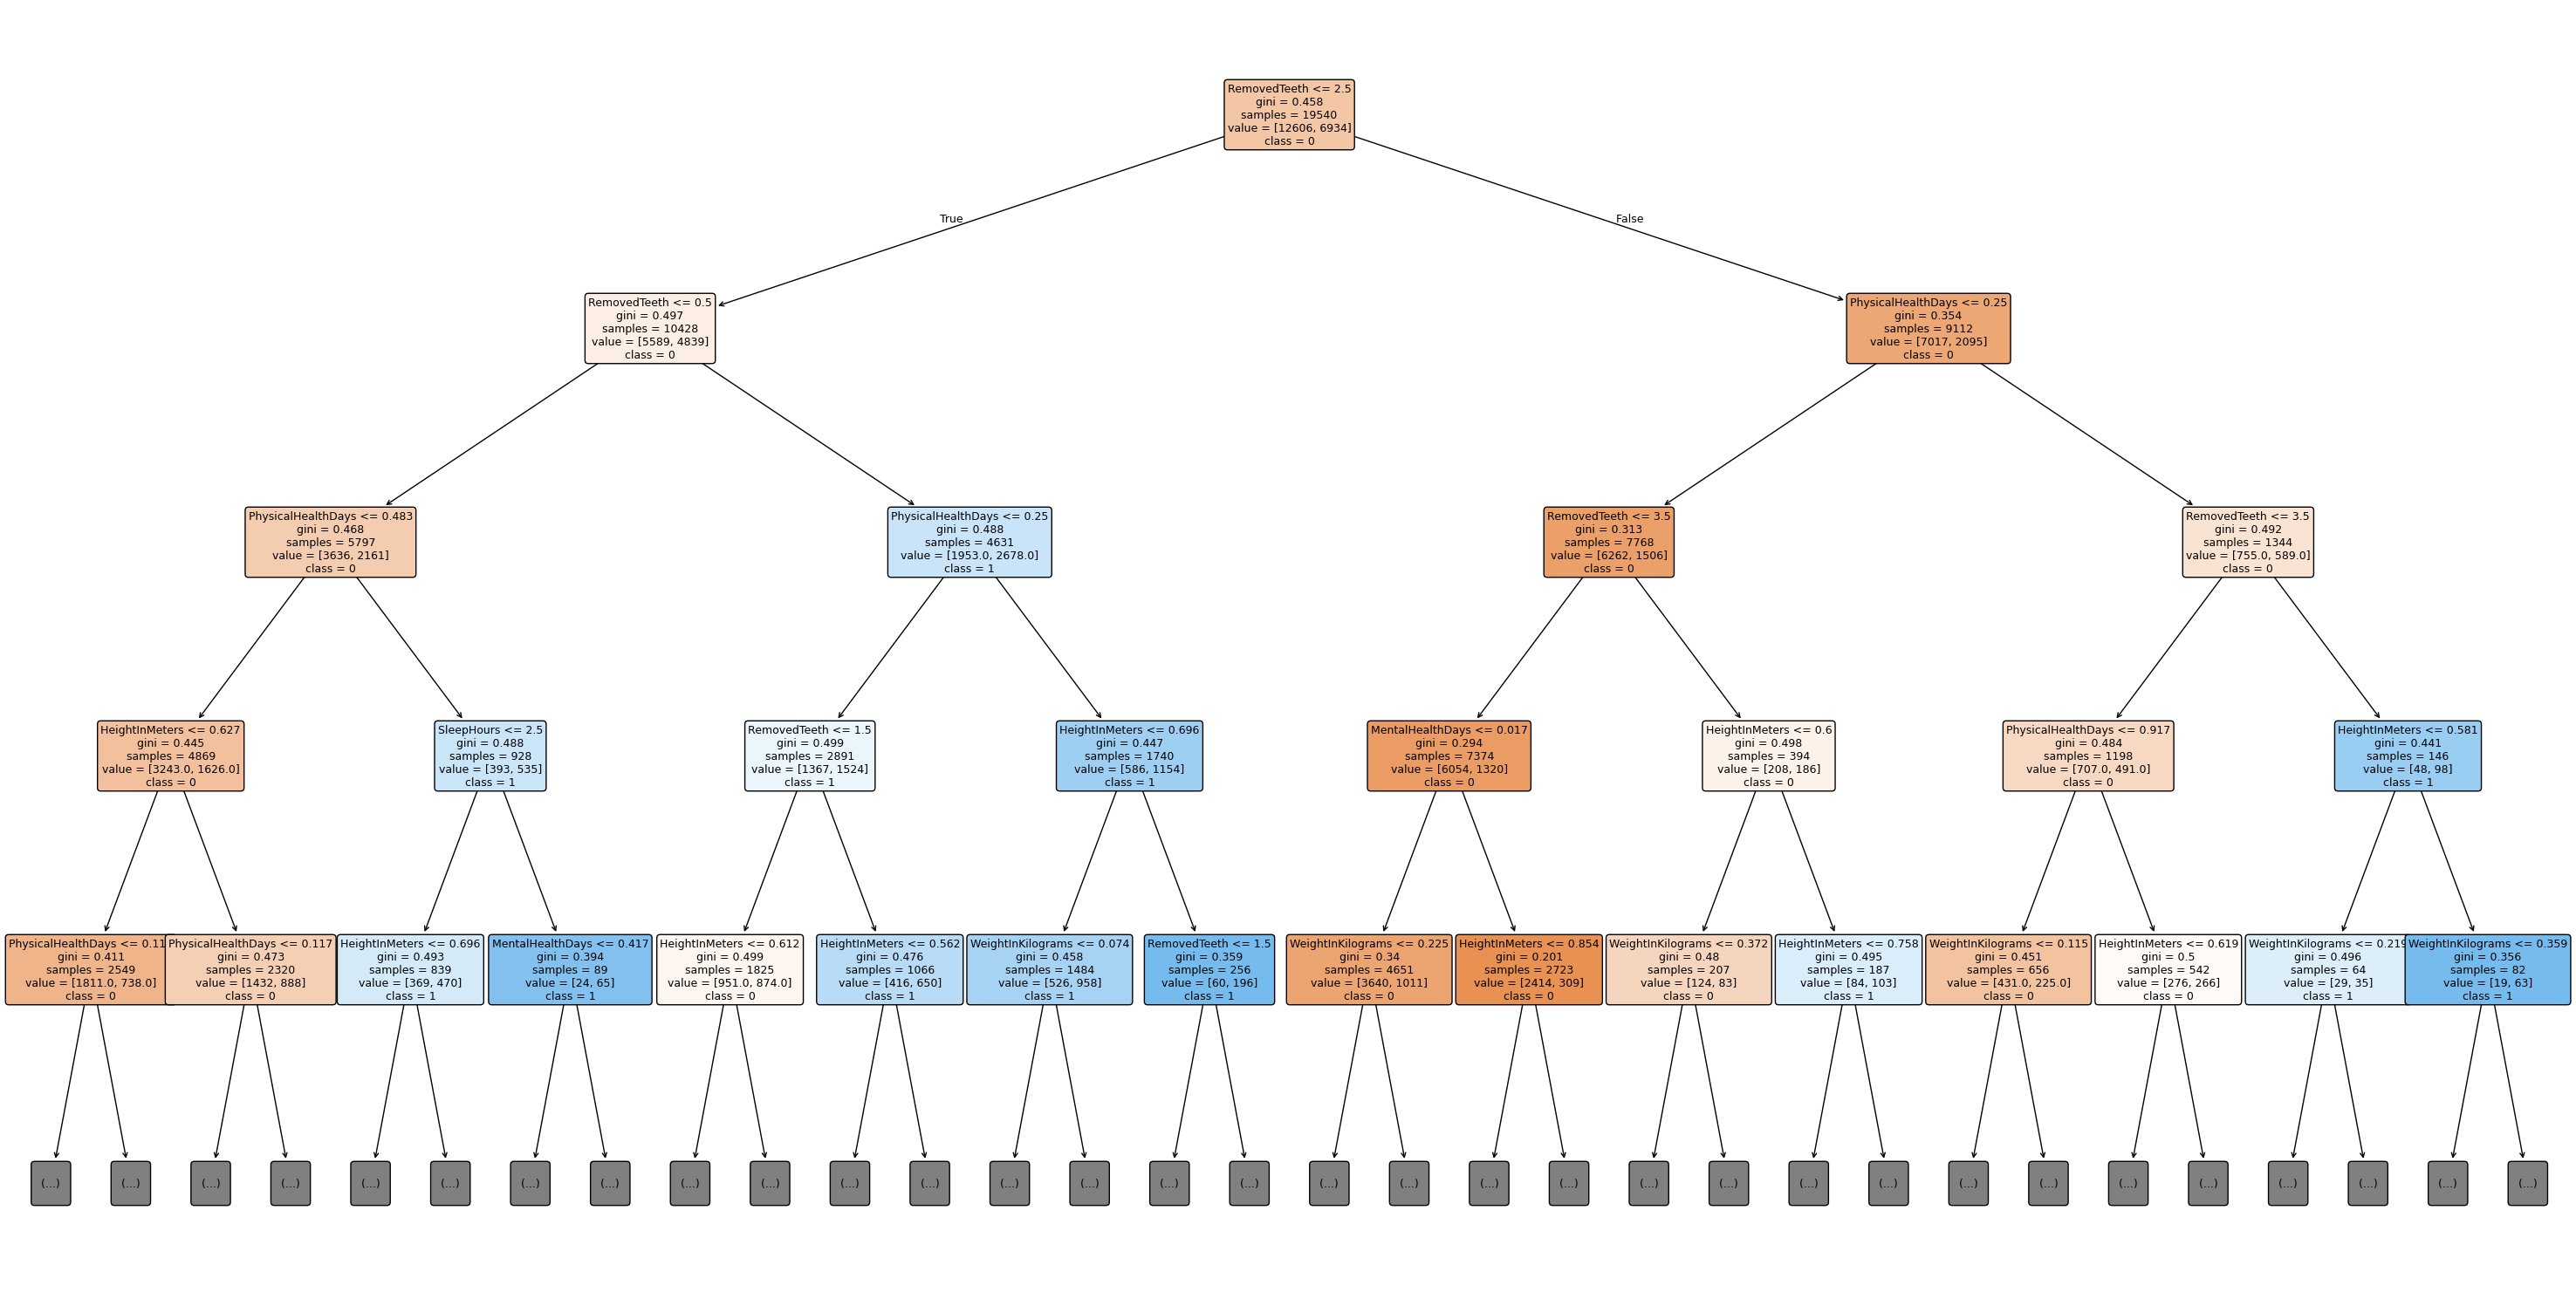

In [ ]:
fig, ax = plt.subplots(figsize=(30, 15), dpi=100)  # Wider figure, moderate height, high DPI
class_names = [str(c) for c in sorted(y_train_80.unique())]

plot_tree(
    clf8020g,
    filled=True,
    feature_names=X_train_80.columns,
    class_names=class_names,
    rounded=True,
    ax=ax,
    fontsize=9,   # Smaller font for readability
    max_depth=4              # Optional: limit depth for a cleaner view
)

plt.tight_layout()  # Adjust layout to fit content neatly
plt.show()


**Key Features:**
Removed Teeth and Physical Health Days are the most important features for predicting heart attack risk.
Individuals with fewer removed teeth and fewer days of poor physical health are more likely to be classified as not having had a heart attack.

**Structure of the Tree:**
The Gini impurity (measure of “mixed” classes) decreases as we go deeper into the tree, meaning the model makes clearer classifications at the lower levels.

##Split 70% 30%

In [ ]:
# Second split: 30-70 split ratio, Gini criterion

X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)
clf7030g = DecisionTreeClassifier(criterion='gini', random_state=42)
clf7030g = clf7030g.fit(X_train_70, y_train_70)
y_pred_gini = clf7030g.predict(X_test_30)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test_30, y_pred_gini)
print("Accuracy:", accuracy)

Accuracy: 0.6224072052401747


**Accuracy:**
Accuracy slightly drops to 62.24%, which is expected as the larger test set provides more variability and potential errors in prediction.

[[3506 1218]
 [1549 1055]]


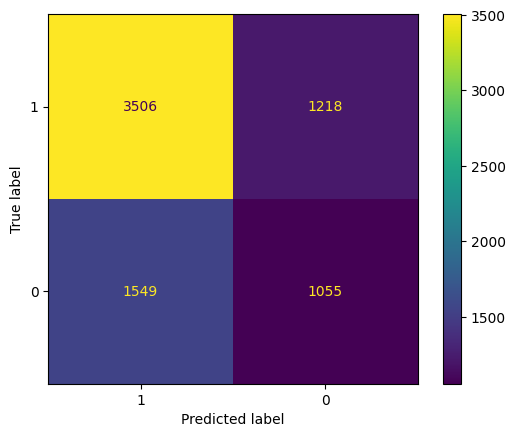

In [ ]:
cm = confusion_matrix(y_test_30, y_pred_gini)
print(cm)

cn=pre_processed['HadHeartAttack'].unique()

disp = ConfusionMatrixDisplay.from_estimator(clf7030g, X_test_30, y_test_30, display_labels=cn)

True negatives (3506) and false positives (1218) follow similar patterns, with a slight increase in the number of missed (1549) and correctly identified (1055) heart attack cases due to the expanded test set.


In [ ]:
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

Error Rate: 0.3775927947598253
Sensitivity: 0.40514592933947774
Specificity: 0.7421676545300593
Precision: 0.46414430268367796


**Error Rate:**
The error rate increases to 37.76%, showing more incorrect predictions compared to the 80-20 split.
Sensitivity (Recall):
Sensitivity drops to 40.51%, indicating further difficulty in detecting positive cases.

**Specificity:**
Specificity remains high at 74.22%, reinforcing the model's bias toward correctly predicting negative cases.

**Precision:**
Precision is slightly reduced to 46.41%, showing a slight decrease in the reliability of positive predictions.

**Observation:**
The trade-off between sensitivity and specificity becomes more evident with the larger test set, reaffirming the need to improve the model's ability to capture positive cases.

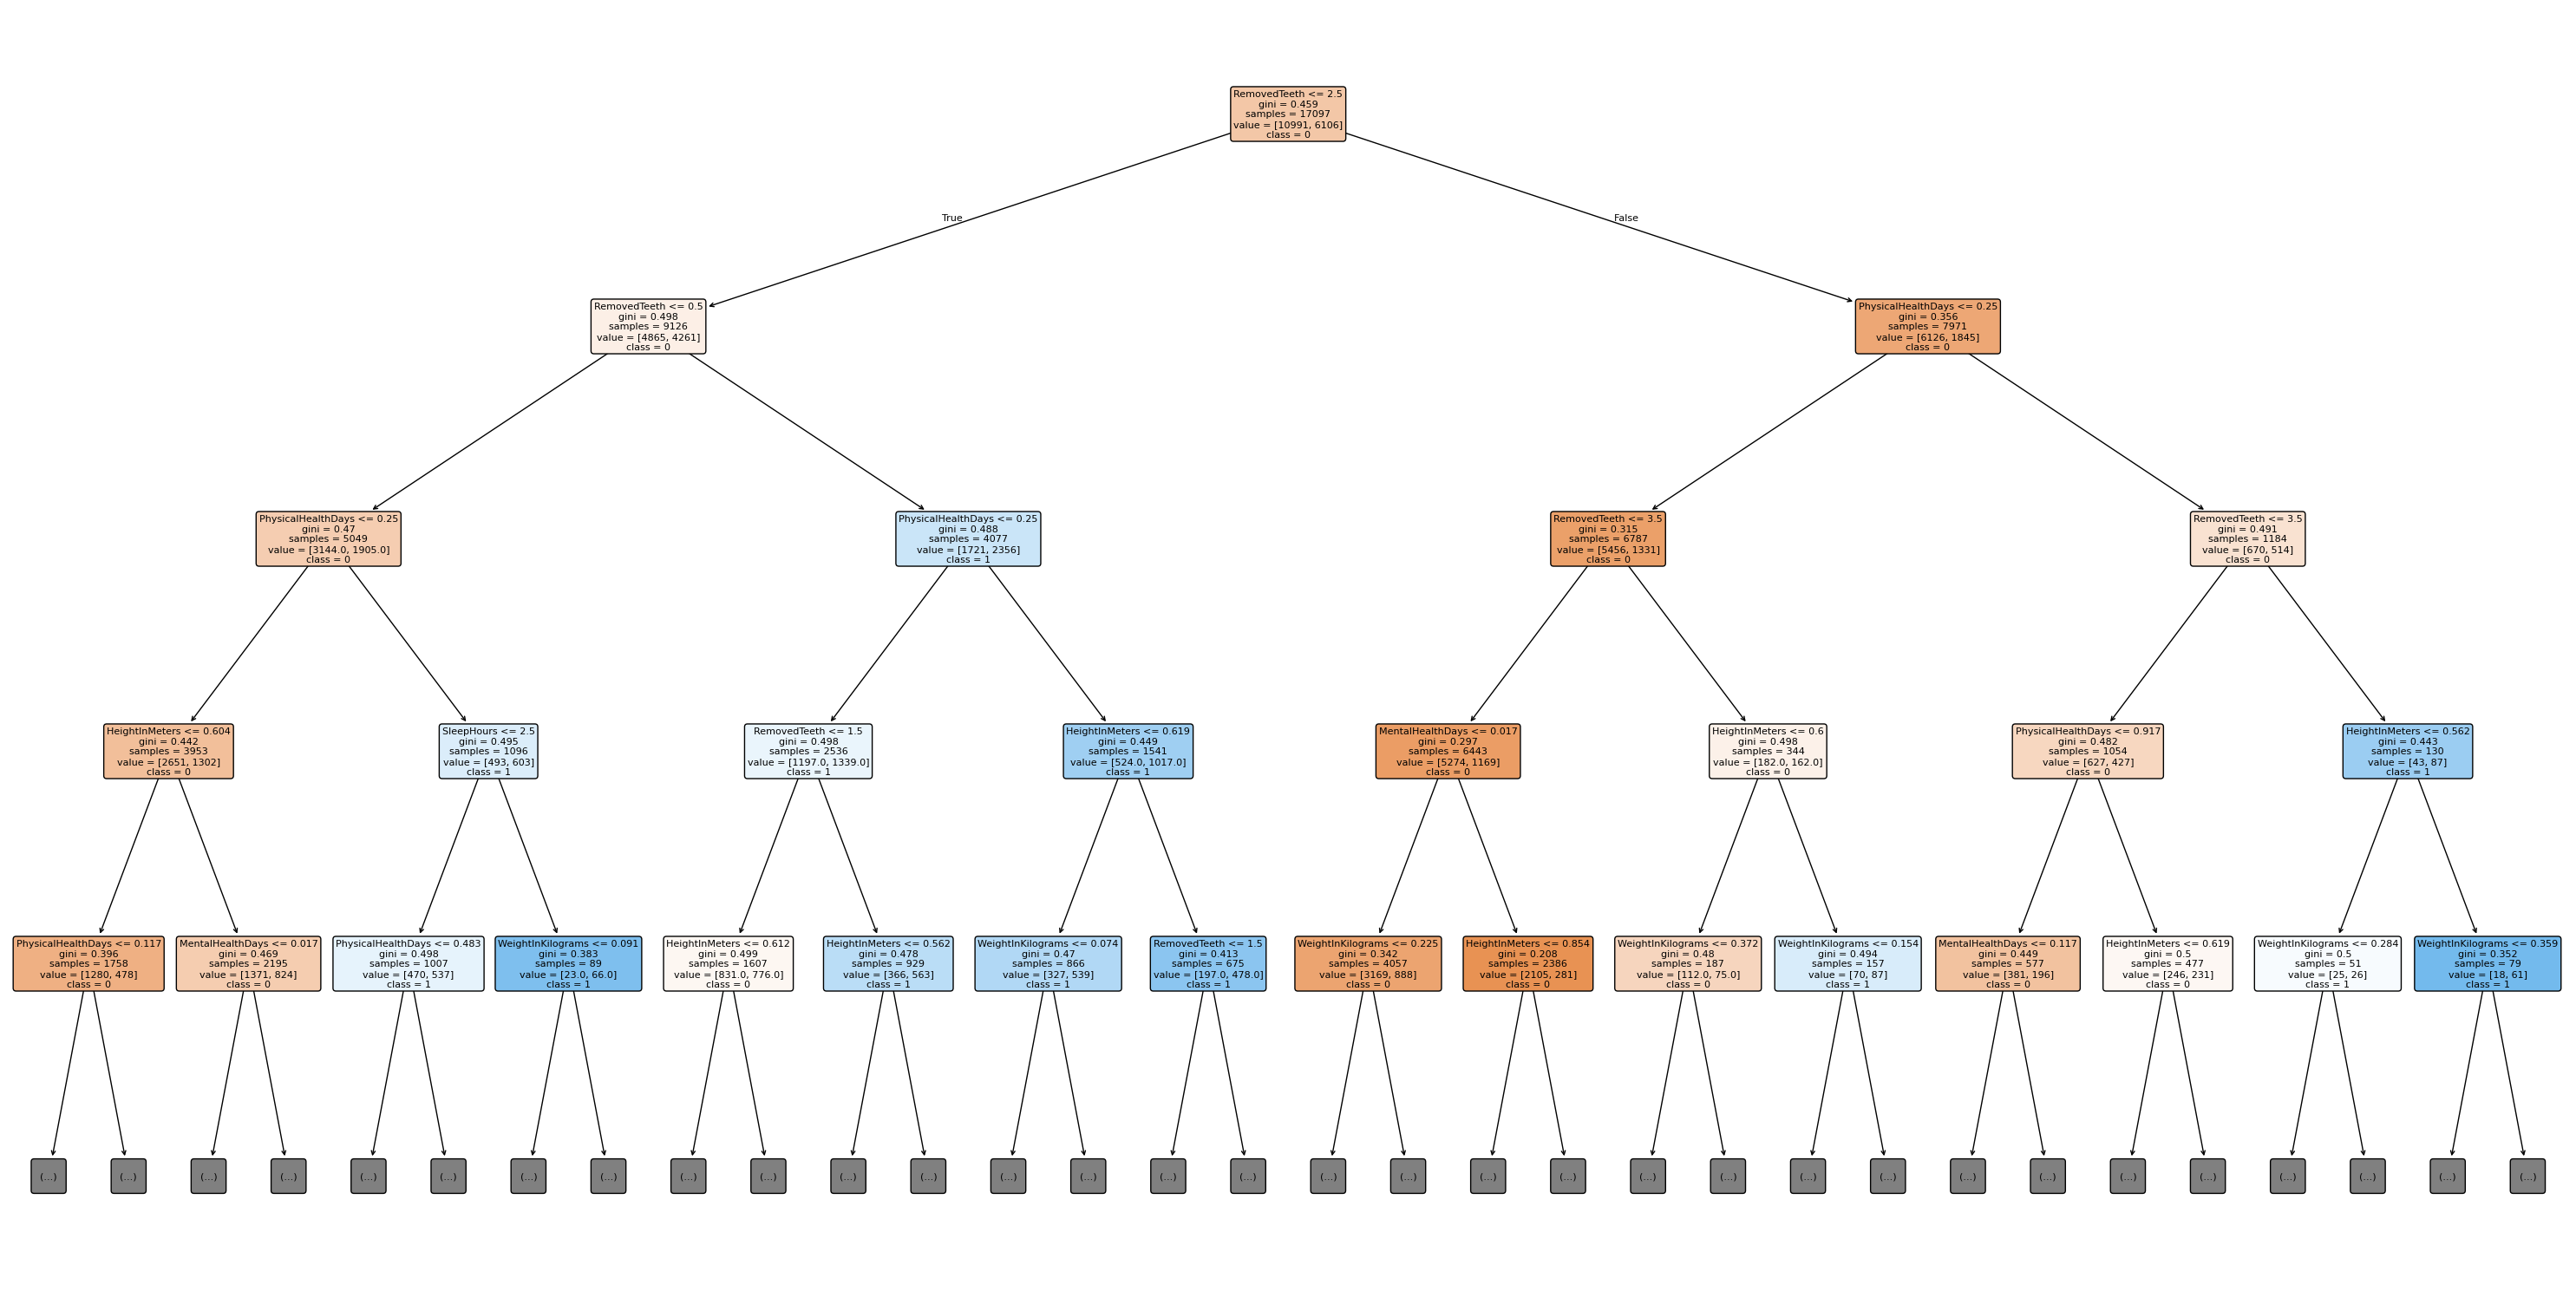

In [ ]:
fig, ax = plt.subplots(figsize=(30, 15), dpi=100)
class_names = [str(c) for c in sorted(y_train_70.unique())]

plot_tree(
    clf7030g,
    filled=True,
    feature_names=X_train_70.columns,
    class_names=class_names,
    rounded=True,
    ax=ax,
    fontsize=8,
    max_depth=4
)

plt.tight_layout()
plt.show()



**Key Features:**
The most important features for predicting heart attack risk are RemovedTeeth, PhysicalHealthDays, and HeightInMeters.
Lower values in these features (fewer removed teeth, fewer days of poor physical health, shorter height) are associated with a lower likelihood of a heart attack.

**Observations:**
This 70-30 split model follows a similar pattern as the 80-20 split, relying on the same key features.
However, the 70-30 split shows slightly more complexity in its structure, suggesting it may capture additional patterns.


##Split 60% 40%

In [ ]:
# Third split: 40-60 split ratio, Gini criterion
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(X, y, test_size=0.4, random_state=42)
clf6040g = DecisionTreeClassifier(criterion='gini', random_state=42)
clf6040g = clf6040g.fit(X_train_60, y_train_60)
y_pred_gini = clf6040g.predict(X_test_40)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test_40, y_pred_gini)
print("Accuracy:", accuracy)

Accuracy: 0.627942681678608


**Accuracy:**
The accuracy improves slightly to 62.79%, despite the larger test set. This suggests that the model generalizes well even as the test data increases.

[[4633 1644]
 [1991 1502]]


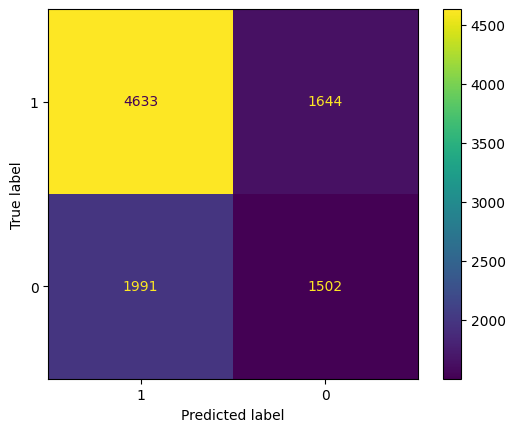

In [ ]:
cm = confusion_matrix(y_test_40, y_pred_gini)
print(cm)

cn=pre_processed['HadHeartAttack'].unique() #classes_names

disp = ConfusionMatrixDisplay.from_estimator(clf6040g, X_test_40, y_test_40, display_labels=cn)

The model correctly identifies more true positives (1502) compared to the previous splits, but it also misclassifies more false positives and false negatives due to the larger test set.

In [ ]:
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

Error Rate: 0.372057318321392
Sensitivity: 0.43000286286859435
Specificity: 0.7380914449577823
Precision: 0.47743165924984104


**Error Rate:**
Error rate remains consistent at 37.21%, reflecting stability in the model's classification ability across test sizes.

**Sensitivity (Recall):**
Sensitivity improves slightly to 43.00%, indicating a marginally better detection of true positives.

**Specificity:**
Specificity remains strong at 73.81%, showing that the model continues to excel at identifying true negatives.

**Precision:**
Precision is 47.74%, reflecting moderate reliability of positive predictions.

**Observation:**
The model's performance stabilizes across the splits, suggesting robustness but also revealing a persistent imbalance in sensitivity and specificity.


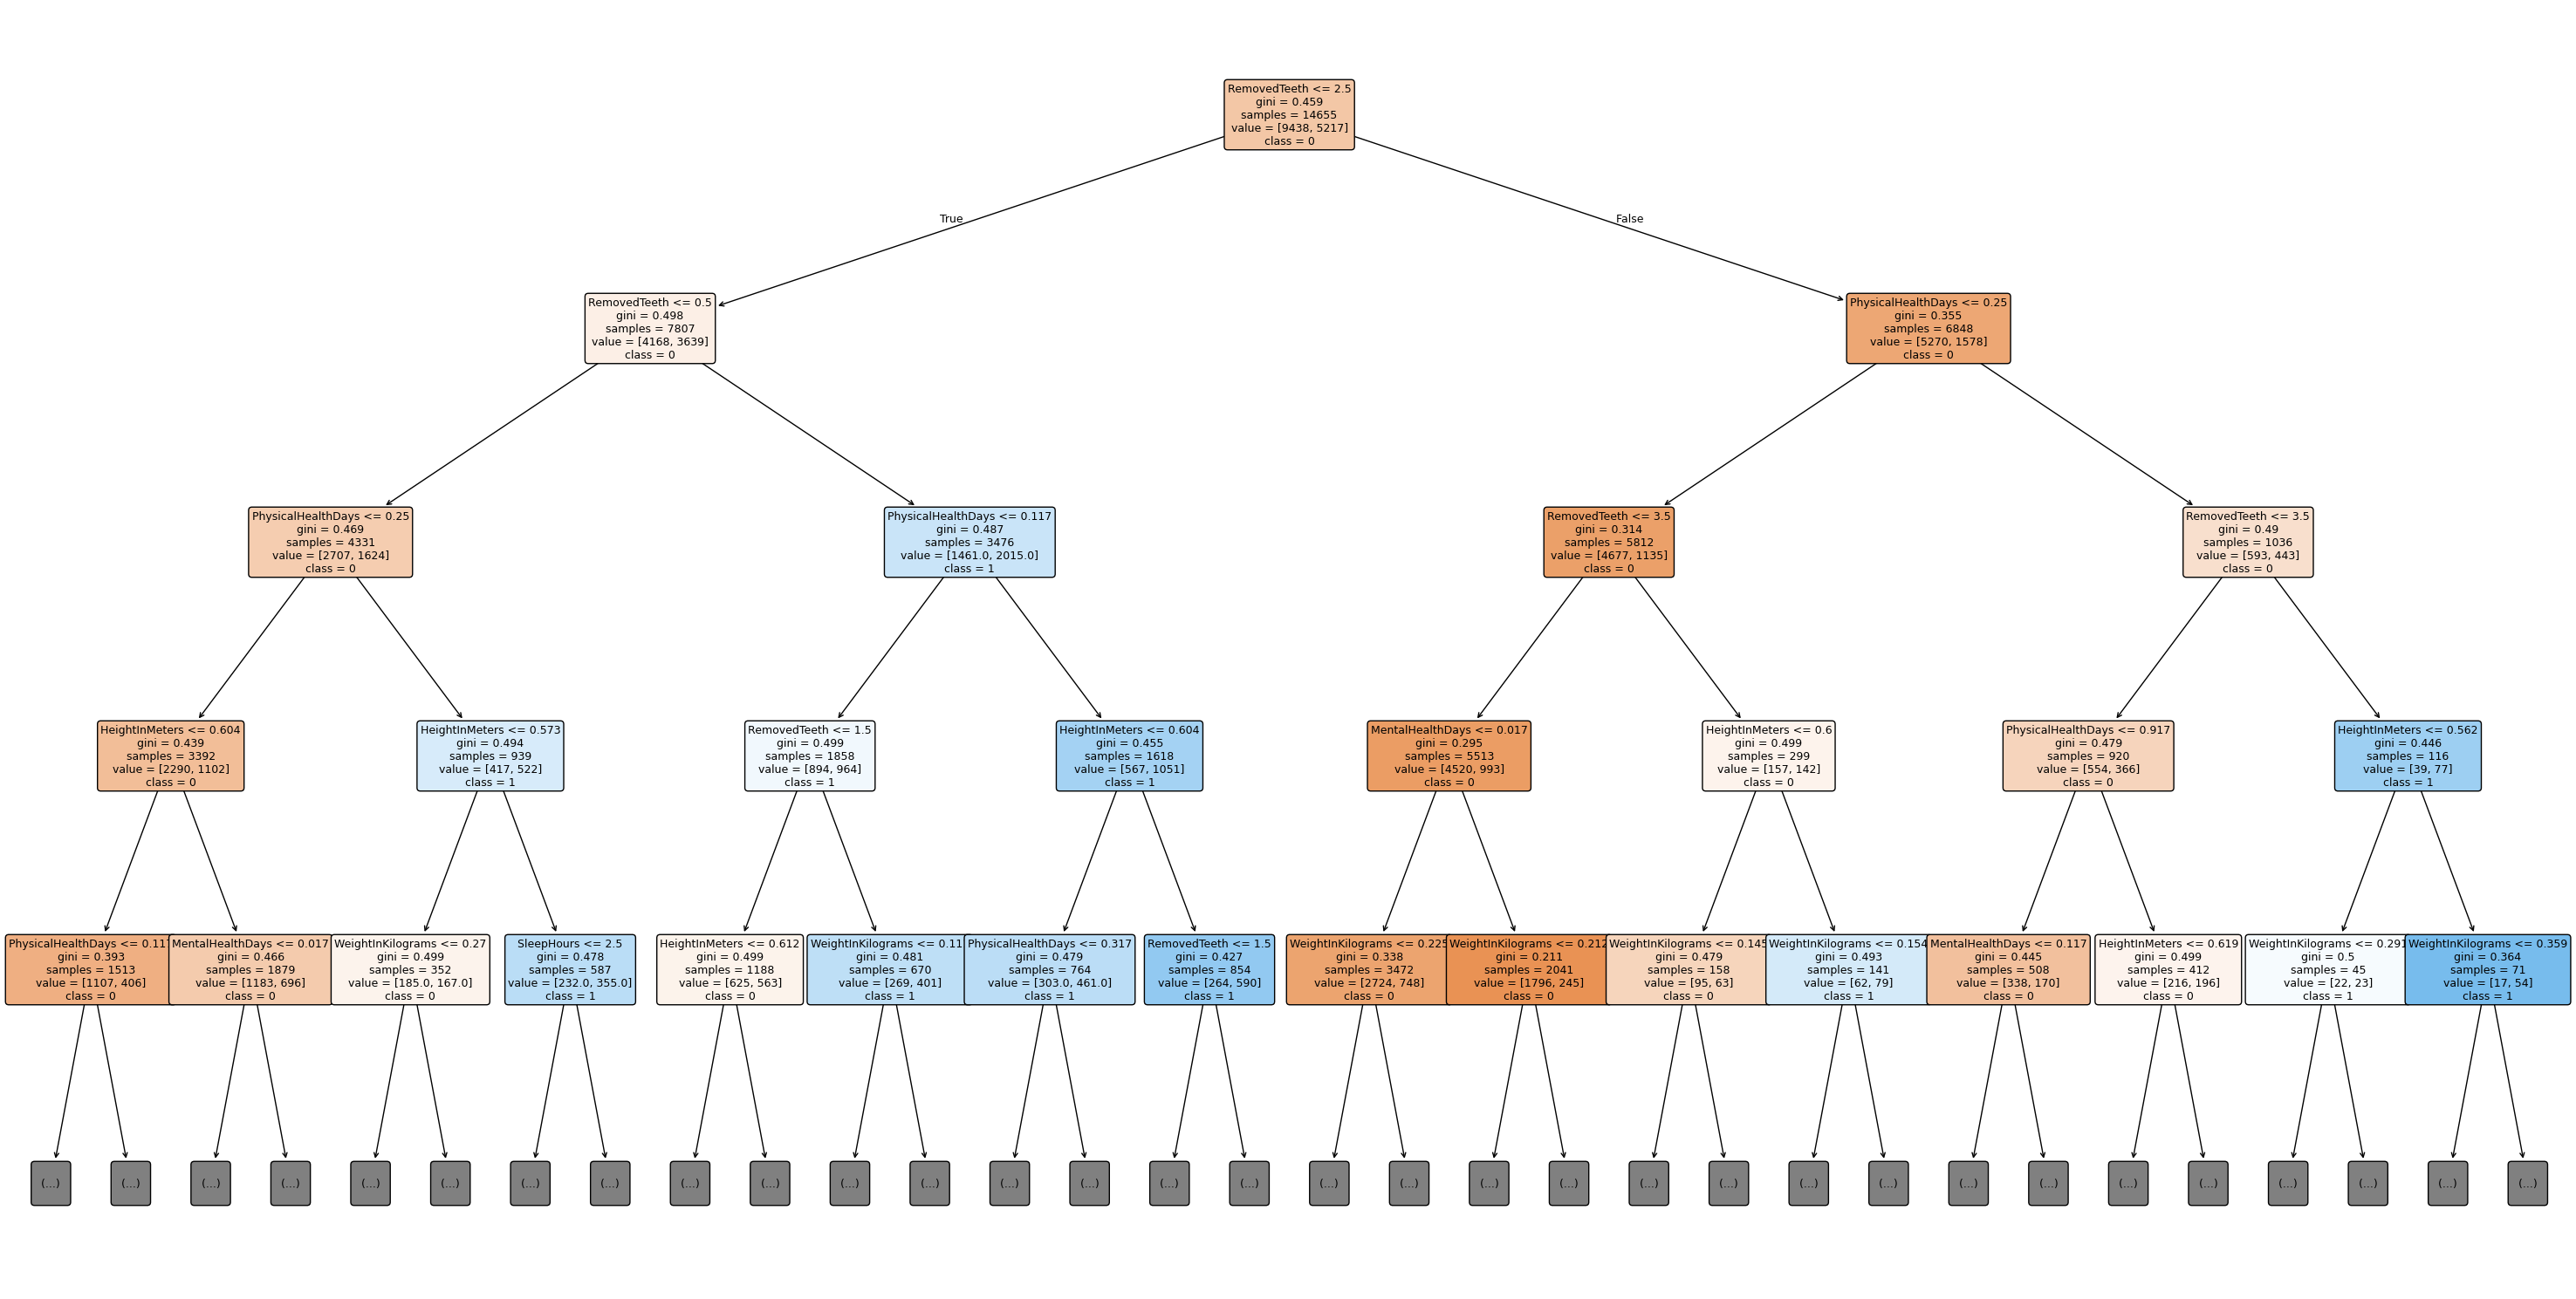

In [ ]:
fig, ax = plt.subplots(figsize=(30, 15), dpi=100)
class_names = [str(c) for c in sorted(y_train_60.unique())]

plot_tree(
    clf6040g,
    filled=True,
    feature_names=X_train_60.columns,
    class_names=class_names,
    rounded=True,
    ax=ax,
    fontsize=9,
    max_depth=4
)

plt.tight_layout()
plt.show()


**Key Features:** The most significant features across all splits are RemovedTeeth, PhysicalHealthDays, and HeightInMeters. Fewer removed teeth and fewer days of poor physical health consistently indicate a lower likelihood of a heart attack.

**Observation:** Across the 80-20, 70-30, and 60-40 splits, the model shows similar behavior, consistently using the same key features to make predictions. With each larger split, the model gains slightly more complexity and branching, which might help it capture additional patterns.

#**Entropy**

##Split 80% 20%

In [ ]:
# First split: 20-80 split ratio, Entropy criterion
clf8020e = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf8020e= clf8020e.fit(X_train_80, y_train_80)
y_pred_entropy = clf8020e.predict(X_test_20)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test_20, y_pred_entropy)
print("Accuracy:", accuracy)

Accuracy: 0.6239508700102354


**Accuracy:**
Accuracy is 62.39%, slightly lower than the Gini criterion. This indicates similar but slightly less effective performance.

[[2310  799]
 [1038  738]]


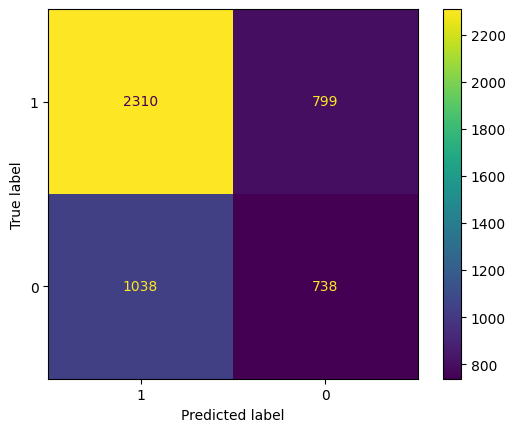

In [ ]:
cm = confusion_matrix(y_test_20, y_pred_entropy)
print(cm)

cn=pre_processed['HadHeartAttack'].unique() #classes_names

disp = ConfusionMatrixDisplay.from_estimator(clf8020e, X_test_20, y_test_20, display_labels=cn)



Results closely resemble the Gini-based model, with slightly fewer true positives (738) and slightly more false negatives (1038).

In [ ]:
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

Error Rate: 0.3760491299897646
Sensitivity: 0.4155405405405405
Specificity: 0.7430041814088131
Precision: 0.4801561483409239


**Error Rate:**
The error rate is 37.60%, marginally worse than the Gini criterion.

**Sensitivity (Recall):**
Sensitivity of 41.55% is slightly lower than the Gini criterion, indicating reduced ability to detect true positives.

**Specificity:**
Specificity of 74.30% is similar to the Gini-based model.
Precision:
Precision of 48.02% shows a minor decline in the reliability of positive predictions.

**Observation:**
The entropy-based model performs comparably to the Gini-based model but appears slightly less effective at identifying positive cases.


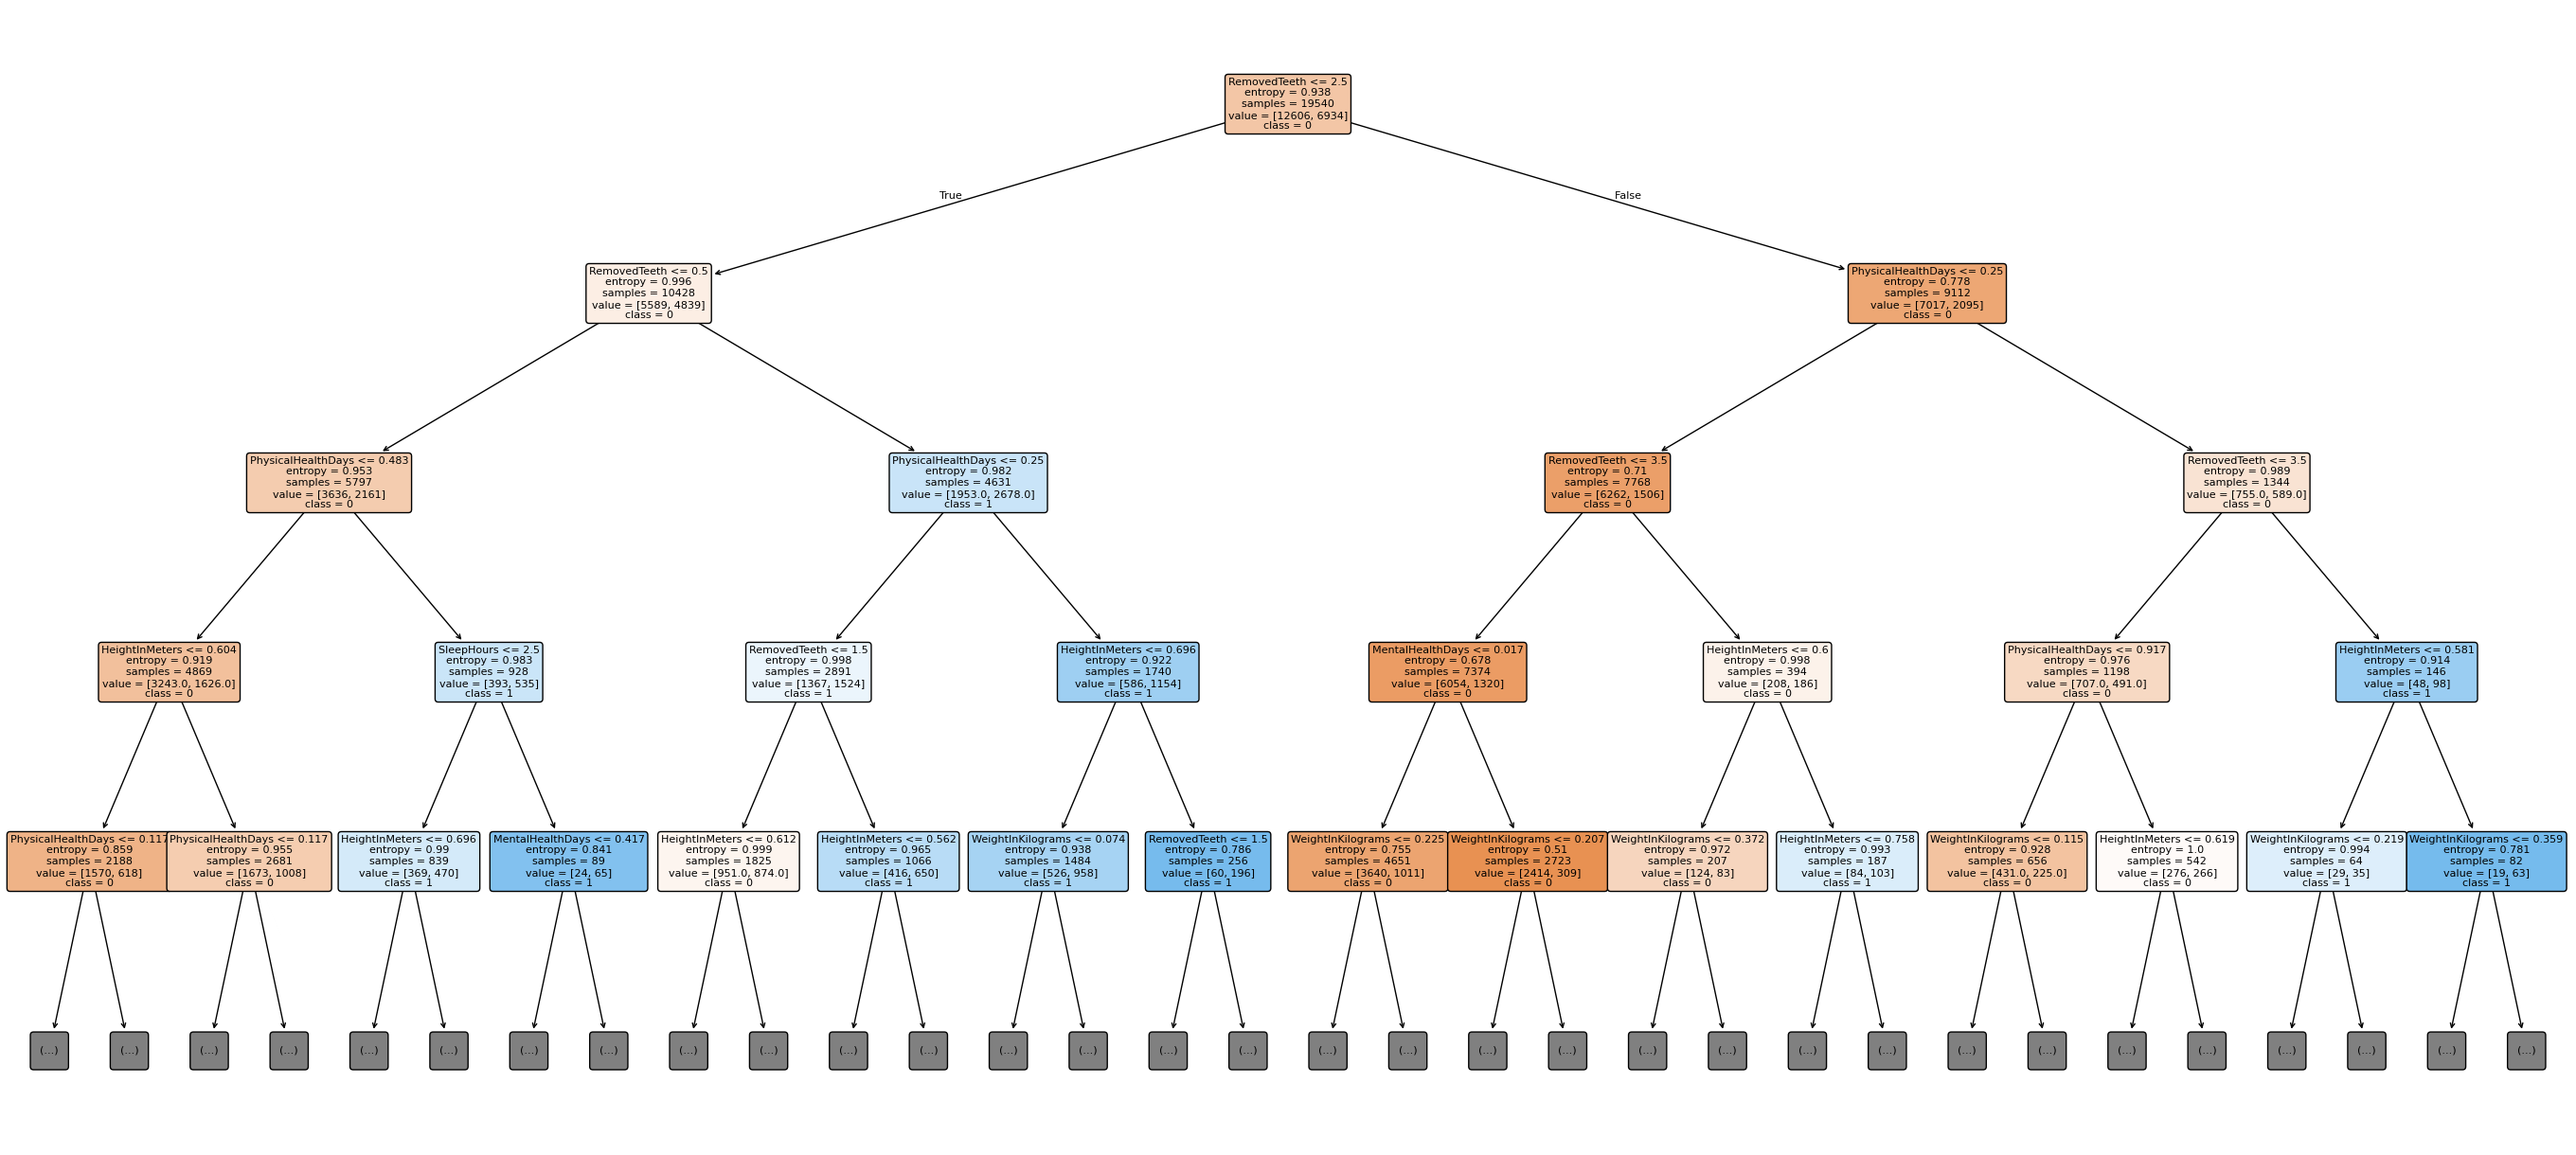

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 15), dpi=100)
class_names = [str(c) for c in sorted(y_train_80.unique())]
plot_tree(
    clf8020e,
    filled=True,
    feature_names=X_train_80.columns,
    class_names=class_names,
    rounded=True,
    ax=ax,
    fontsize=8,  # Increase or decrease as needed for readability
    max_depth=4
)
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)
plt.show()


**Key Features:**
For the 80-20 split with the Entropy criterion, the primary features influencing heart attack prediction are RemovedTeeth, PhysicalHealthDays, and HeightInMeters. Individuals with fewer removed teeth and fewer days of poor physical health are more likely to be classified as not having had a heart attack.

**Observation:**
Using the Entropy criterion, the model’s structure and key features are similar to the Gini criterion version. Both rely heavily on dental and physical health indicators to make predictions, though the Entropy-based tree shows slightly different splits and branching paths. Like the Gini-based tree, the Entropy-based model still tends to focus on correctly predicting non-heart attack cases.

##Split 70% 30%

In [ ]:
# Second split: 30-70 split ratio, Entropy criterion
clf7030e = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf7030e = clf7030e.fit(X_train_70, y_train_70)
y_pred_entropy = clf7030e.predict(X_test_30)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test_30, y_pred_entropy)
print("Accuracy:", accuracy)

Accuracy: 0.6225436681222707


**Accuracy:**
Accuracy remains consistent at 62.25%, matching the Gini-based model.

[[3504 1220]
 [1546 1058]]


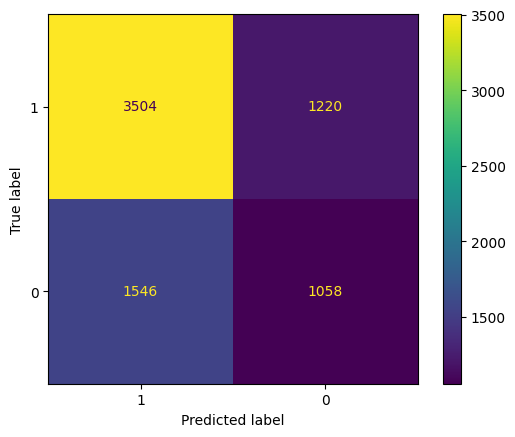

In [ ]:
cm = confusion_matrix(y_test_30, y_pred_entropy)
print(cm)

cn=pre_processed['HadHeartAttack'].unique() #classes_names

disp = ConfusionMatrixDisplay.from_estimator(clf7030e, X_test_30, y_test_30, display_labels=cn)

The confusion matrix values are similar, with minor differences in misclassification counts.

In [ ]:
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

Error Rate: 0.3774563318777293
Sensitivity: 0.4062980030721966
Specificity: 0.7417442845046571
Precision: 0.46444249341527655


**Error Rate:**
Error rate of 37.75% is consistent with the Gini criterion.

**Sensitivity (Recall):**
Sensitivity of 40.63% is slightly better than the Gini-based model, though still low.

**Specificity:**
Specificity of 74.17% is comparable.

**Precision:**
Precision of 46.44% is similar, reflecting consistent performance.

**Observation:**
The entropy criterion provides no notable improvement over the Gini criterion in this split.

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 15), dpi=400)
class_names = [str(c) for c in sorted(y_train_70.unique())]
plot_tree(
    clf7030e,
    filled=True,
    feature_names=X_train_70.columns,
    class_names=class_names,
    rounded=True,
    ax=ax,
    fontsize=8,  # Increase or decrease as needed for readability
    max_depth=4
)
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)
plt.show()


**Key Features:**
In the 70-30 split with the Entropy criterion, the primary features for predicting heart attack risk remain RemovedTeeth, PhysicalHealthDays, and HeightInMeters. These features indicate that fewer removed teeth and fewer days of poor physical health are linked to a lower likelihood of a heart attack.

**Observation:**
The 70-30 split with the Entropy criterion is similar to the 80-20 split and Gini-based models. The Entropy-based model shows slight variations in branching paths but ultimately follows the same structure.

##Split 60% 40%

In [ ]:
# Third split: 40-60 split ratio, Entropy criterion
clf6040e = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf6040e = clf6040e.fit(X_train_60, y_train_60)
y_pred_entropy = clf6040e.predict(X_test_40)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test_40, y_pred_entropy)
print("Accuracy:", accuracy)

Accuracy: 0.6271238485158649


**Accuracy:**
Accuracy is 62.71%, slightly below the Gini criterion.

[[4649 1628]
 [2015 1478]]


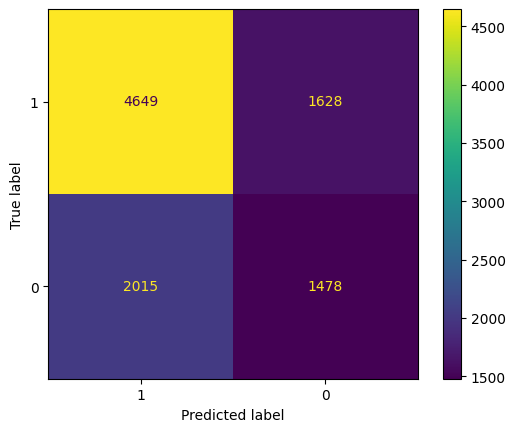

In [ ]:
cm = confusion_matrix(y_test_40, y_pred_entropy)
print(cm)

cn=pre_processed['HadHeartAttack'].unique() #classes_names

disp = ConfusionMatrixDisplay.from_estimator(clf6040e, X_test_40, y_test_40, display_labels=cn)

Confusion matrix results are consistent with previous observations.

In [ ]:
# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

Error Rate: 0.3728761514841351
Sensitivity: 0.42313197824219867
Specificity: 0.740640433328023
Precision: 0.47585318737926596


**Error Rate:**
Error rate is 37.29%, reflecting minor differences in misclassification.

**Sensitivity (Recall):**
Sensitivity of 42.31% is slightly lower than the Gini-based model.

**Specificity:**
Specificity of 74.06% is comparable to the Gini-based model.

**Precision:**
Precision of 47.59% remains consistent.

**Observation:**
The entropy criterion offers no significant performance advantage over the Gini criterion in this split.

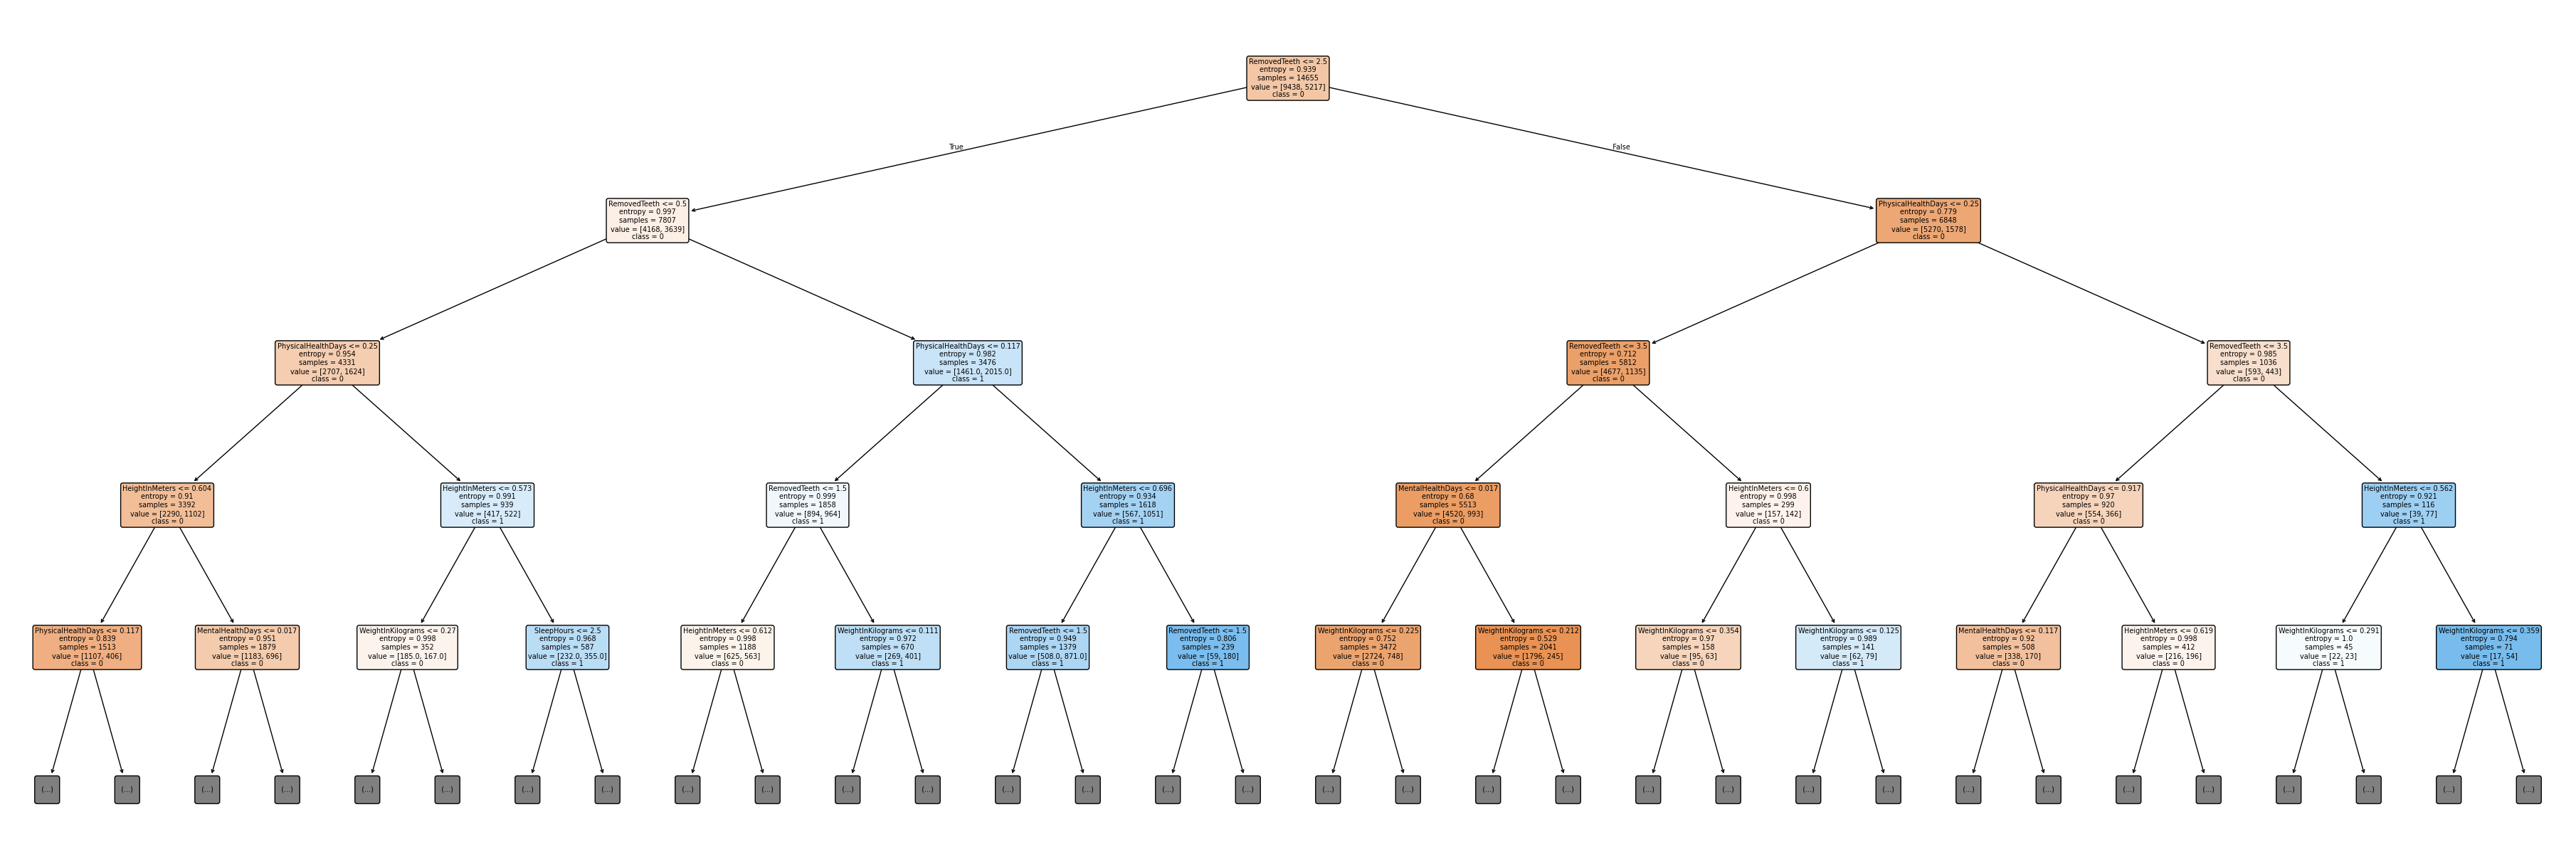

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(40, 15), dpi=100)
class_names = [str(c) for c in sorted(y_train_60.unique())]
plot_tree(
    clf6040e,
    filled=True,
    feature_names=X_train_60.columns,
    class_names=class_names,
    rounded=True,
    ax=ax,
    fontsize=7,  # Increase or decrease as needed for readability
    max_depth=4

)
plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)
plt.show()

**Key Features:**
In the 60-40 split using the Entropy criterion, the key features for predicting heart attack risk are again RemovedTeeth, PhysicalHealthDays, and HeightInMeters. Fewer removed teeth and fewer days of poor physical health correlate with a lower chance of having had a heart attack, similar to previous models.

**Observation:**
This 60-40 split model using the Entropy criterion aligns with the patterns seen in other splits (80-20 and 70-30) and with the Gini-based models, relying on similar key features. The Entropy-based model here also maintains a similar structure and depth as other splits.

#**Clustering**

In the K-means Clustering we can see that:
1-The first data point belongs to cluster 0, indicating it shares characteristics close to the average profile of cluster 0 described above
Second Data Point:

2-The second data point belongs to cluster 1, indicating it shares characteristics close to the average profile of cluster 1, which reflects slightly below average physical and mental health days, higher removed teeth count, and lower height and weight.
Third Data Point:

3-The third data point belongs to cluster 3, suggesting it has characteristics that are predominantly lower in physical and mental health days and fewer removed teeth, which may reflect better overall health status compared to other clusters.
Fourth Data Point:

4-The fourth data point also belongs to cluster 3, highlighting that it has characteristics similar to those with lower health issues, particularly noted for few dental concerns and potentially better health outcomes.
Fifth Data Point:

5-The fifth data point belongs to cluster 1, indicating similar traits to those found in cluster 1 with marginally lower health metrics and a higher number of removed teeth, which could suggest areas for health improvement.

In other words:
-Cluster 0:
Slightly below average physical and mental health days, higher removed teeth count, above average height and weight, average sleep, and no major indication of heart attacks.

-Cluster 1:
Slightly below average physical and mental health days, higher removed teeth count, below average height and weight, slightly better sleep, and likely no or fewer heart attacks.

-Cluster 2:
Significantly above average physical and mental health days, average removed teeth, average height and weight, below average sleep, and higher likelihood of heart attacks.

-Cluster 3:
Below average in almost all metrics, particularly low on removed teeth, suggesting better dental health.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


try:
    pre_processed = pd.read_csv('/content/Processed_dataset.csv', encoding='latin1')  # Update path and encoding as necessary
except FileNotFoundError:
    print("The specified file was not found.")
    raise

# Print columns for diagnostics
print("Columns in pre_processed:", pre_processed.columns.tolist())

# Define columns to drop (update as necessary)
columns_to_drop = [
    'State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
    'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
    'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
    'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
    'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'
]

# Drop specified columns with error handling
features = pre_processed.drop(columns=columns_to_drop, errors='ignore')

# Select numeric features for clustering
numeric_features = features.select_dtypes(include=[np.number])

# Standardize the numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Create a DataFrame for scaled features
scaled_data = pd.DataFrame(scaled_features, columns=numeric_features.columns)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
scaled_data_imputed = imputer.fit_transform(scaled_data)

# Convert the imputed data back to DataFrame
scaled_data_imputed = pd.DataFrame(scaled_data_imputed, columns=scaled_data.columns)

# Set the random seed for reproducibility
np.random.seed(42)

# Define the number of clusters
n_clusters = 4

# Initialize the KMeans object
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Apply KMeans clustering
kmeans.fit(scaled_data_imputed)  # Use the imputed scaled data for clustering

# Print cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Print cluster labels
print("\nCluster Labels:")
print(kmeans.labels_)

# Optionally, you could add the cluster labels to the original features DataFrame
features['Cluster'] = kmeans.labels_

# If you want to see the first few rows of features with cluster labels
print(features.head())

Columns in pre_processed: ['PhysicalHealthDays', 'MentalHealthDays', 'RemovedTeeth', 'HeightInMeters', 'WeightInKilograms', 'SleepHours', 'HadHeartAttack']
Cluster Centers:
[[-0.09645139  0.00466463  0.388438    1.09242809  1.22723175 -0.17395619
  -0.31150699]
 [-0.27087387 -0.03951206  0.89953339 -0.41237209 -0.53702798  0.0332544
  -0.71035244]
 [ 0.37611608  0.08441583 -0.27509329 -0.07599571 -0.07330591  0.062707
   1.34213095]
 [-0.1063499  -0.07480309 -1.12092132 -0.30262143 -0.26063083  0.01724413
  -0.74447803]]

Cluster Labels:
[2 2 2 ... 3 3 3]
   PhysicalHealthDays  MentalHealthDays  RemovedTeeth  HeightInMeters  \
0                 0.8               0.0             2        0.646154   
1                 0.0               0.0             3        0.592308   
2                 0.0               0.0             0        0.630769   
3                 0.0               0.0             0        0.630769   
4                 1.0               0.0             2        0.630769   




## **Clustering visual representation**

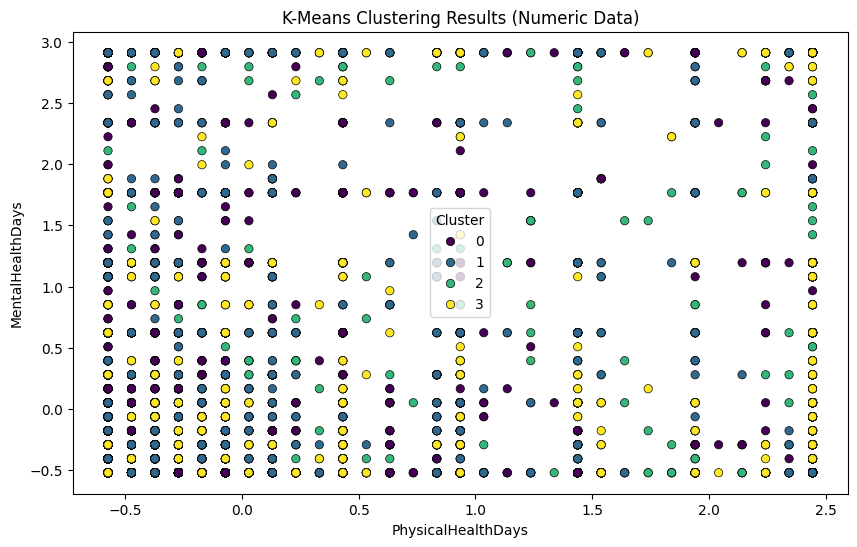

In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


# Assuming balanced_sample is already defined and contains only the necessary columns
# If balanced_sample already contains the selected columns, skip the selection part.

# Identify numeric columns (only numeric columns will be used for clustering)
numeric_columns = pre_processed.select_dtypes(include=[np.number]).columns

# Handle missing values by imputing with the mean for numeric data
imputer = SimpleImputer(strategy='mean')
pre_processed[numeric_columns] = imputer.fit_transform(pre_processed[numeric_columns])

# Standardize the numeric features
scaler = StandardScaler()
pre_processed[numeric_columns] = scaler.fit_transform(pre_processed[numeric_columns])

# Apply KMeans clustering (4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_result = kmeans.fit(pre_processed[numeric_columns])

# Add cluster labels to the numeric DataFrame
pre_processed['Cluster'] = kmeans_result.labels_

# Visualize clustering using a scatter plot of two numeric features
plt.figure(figsize=(10, 6))

# We'll visualize the first two numeric features for simplicity
sns.scatterplot(x=pre_processed[numeric_columns[0]], y=pre_processed[numeric_columns[1]],
                hue='Cluster', data=pre_processed, palette='viridis', edgecolor='k')

# Title and labels
plt.title('K-Means Clustering Results (Numeric Data)')
plt.xlabel(numeric_columns[0])  # Label x-axis with the first numeric feature
plt.ylabel(numeric_columns[1])  # Label y-axis with the second numeric feature
plt.legend(title='Cluster')
plt.show()


 this code performs K-Means clustering on a dataset, preprocesses the data (imputing missing values and standardizing), and visualizes the results with a scatter plot of the first two numeric features.

**Data Preprocessing:**

Identify Numeric Columns: The code selects the numeric columns from pre_processed DataFrame, which will be used for clustering.
Handle Missing Values: Missing values in the numeric columns are filled with the mean of each column using SimpleImputer.
Standardize Features: The numeric features are standardized using StandardScaler to bring all features to a similar scale, which is important for K-Means clustering.

**K-Means Clustering:**

The KMeans algorithm is applied with 4 clusters (n_clusters=4). The algorithm groups the data into clusters based on similarities in the selected features.

**Visualization:**

A scatter plot is created to visualize the clustering results using the first two numeric features. Different clusters are color-coded (hue='Cluster') to show how well the data points are separated.

**Plot Details:**

The plot shows the first two features on the x and y axes, with the clusters represented by different colors. A legend is included to indicate which color corresponds to which cluster.



**results:**
all the colors in K-Means clustering visualization are overlapping, it suggests that the clustering model has not been able to effectively separate the data points into distinct clusters.

Highly correlated feature pairs: []


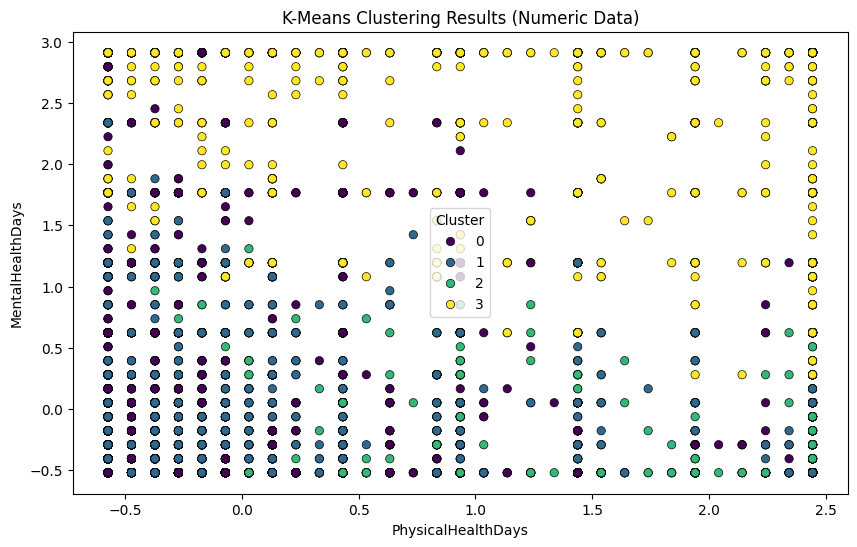

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Assuming balanced_sample is already defined and contains the necessary columns
# Identify numeric columns (only numeric columns will be used for clustering)
numeric_columns = pre_processed.select_dtypes(include=[np.number]).columns

# Handle missing values by imputing with the mean for numeric data
imputer = SimpleImputer(strategy='mean')
pre_processed[numeric_columns] = imputer.fit_transform(pre_processed[numeric_columns])

# Feature Selection: Remove highly correlated features (correlation threshold 0.9)
corr_matrix = pre_processed[numeric_columns].corr()
# Find highly correlated features (threshold 0.9)
high_corr_var = np.where(abs(corr_matrix) > 0.9)
high_corr_var = [(numeric_columns[x], numeric_columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]
print(f"Highly correlated feature pairs: {high_corr_var}")

# Drop one feature from each pair of highly correlated features
to_drop = set()
for feature_pair in high_corr_var:
    to_drop.add(feature_pair[1])  # Drop the second feature of each correlated pair
pre_processed = pre_processed.drop(columns=to_drop)

# Identify numeric columns after dropping highly correlated features
numeric_columns = pre_processed.select_dtypes(include=[np.number]).columns

# Standardize the numeric features
scaler = StandardScaler()
pre_processed[numeric_columns] = scaler.fit_transform(pre_processed[numeric_columns])

# Apply KMeans clustering (4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_result = kmeans.fit(pre_processed[numeric_columns])

# Add cluster labels to the numeric DataFrame
pre_processed['Cluster'] = kmeans_result.labels_

# Visualize clustering using a scatter plot of two numeric features
plt.figure(figsize=(10, 6))

# We'll visualize the first two numeric features for simplicity
sns.scatterplot(x=pre_processed[numeric_columns[0]], y=pre_processed[numeric_columns[1]],
                hue='Cluster', data=pre_processed, palette='viridis', edgecolor='k')

# Title and labels
plt.title('K-Means Clustering Results (Numeric Data)')
plt.xlabel(numeric_columns[0])  # Label x-axis with the first numeric feature
plt.ylabel(numeric_columns[1])  # Label y-axis with the second numeric feature
plt.legend(title='Cluster')
plt.show()

in the previous coede we have an issue wtich is Overlapping Clusters
The clustering results show significant overlap, meaning the data points within each cluster are not well separated. This suggests that the features used for clustering may not be distinct enough, causing the KMeans algorithm to struggle in separating the data into clear groups.

**Cause:** Ineffective Feature Selection
The main reason for this overlap is ineffective feature selection. If the features are highly correlated or redundant, the clustering algorithm fails to differentiate between groups, leading to overlapping clusters.

Solution: Improve Feature Selection

**To solve this so we will try to:**

**Remove Highly Correlated Features:**
 By eliminating features that are strongly correlated (above a certain threshold), we reduce redundancy and allow KMeans to focus on the most informative features.

**Standardize the Data:** We scale the features so that each one contributes equally to the clustering process.
These steps help KMeans to better identify distinct clusters, reducing overlap and improving the clustering results,

after applying the solution we can see the overlabbing redused, and yellow color not overlapping with other clusters suggests that the points in the yellow cluster are relatively well-separated from the points in other clusters.

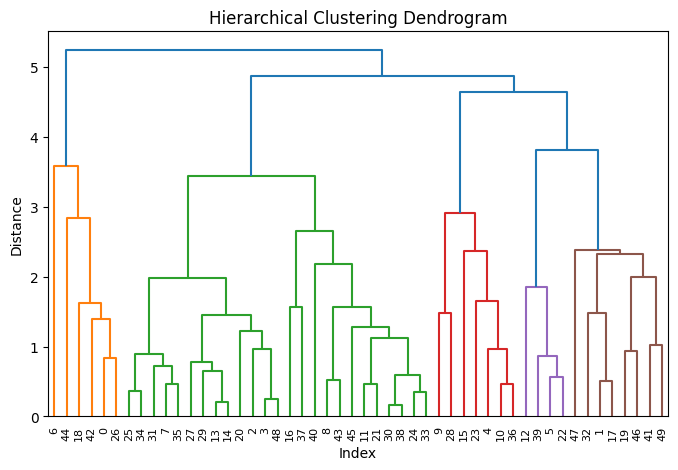

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt  # Assuming you're plotting the dendrogram

# List the columns of interest for clustering
columns_of_interest = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms']

# Check if the columns exist in the DataFrame
valid_columns = [col for col in columns_of_interest if col in pre_processed.columns]

# Select only the relevant columns
features = pre_processed[valid_columns]

# Handle missing values by imputing with the mean for numeric data
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Scale the features (you might want to add this step if it's missing)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

sampled_features = features_scaled[:50, :]  # Taking just 50 rows to drastically reduce complexity(you can try diff numbers)

# Apply Hierarchical Clustering (Complete Linkage)
linkage_matrix = linkage(sampled_features, method='complete')

# Plot the Dendrogram (limit the number of points in the plot for speed)
plt.figure(figsize=(8, 5))

# Reduce the complexity of the dendrogram by limiting the number of points (e.g., using p=10 for fewer branches)
dendrogram(linkage_matrix, p=10)  # Only show the first 10 data points in the dendrogram

# Add title and labels
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()


This code applies Hierarchical Clustering and visualizes the clustering results using a dendrogram


**Data Preprocessing:**


 select a subset of columns (['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms']) from the pre_processed DataFrame for clustering.


**Missing Values:** handling missing values in the selected columns using the mean (SimpleImputer).

**Scaling:** The selected and imputed features are then standardized (scaled) using StandardScaler to ensure all features have the same scale.

**Sampling:** To reduce computation complexity, only takes the first 50 rows from the scaled data for clustering.

**Hierarchical Clustering:**


 performs Hierarchical Clustering using the Complete Linkage method (linkage function from scipy.cluster.hierarchy). This method considers the maximum distance between points in two clusters when deciding whether to merge them.

**Dendrogram Plot:**


 generate a dendrogram, which is a tree-like diagram that shows how the data points (or clusters) are merged at different distances.
The p=10 argument limits the number of points to display in the plot for better readability and speed.
Plot:

The dendrogram is plotted using matplotlib, showing the merging process and how clusters are formed at each step.

**Result Interpretation:**

The dendrogram shows how the data points are grouped together based on similarity. The vertical lines represent the distance at which clusters are merged, and the length of these lines indicates the dissimilarity between the clusters being merged.
The height of the branches shows how similar (or different) the clusters are; shorter branches indicate more similar clusters

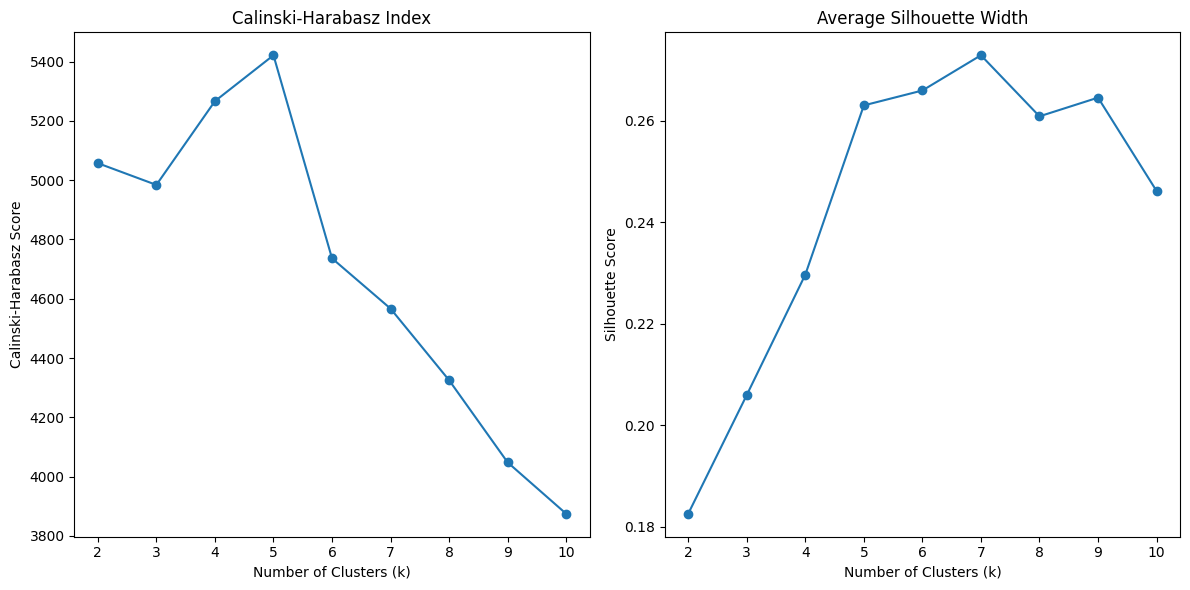

In [ ]:

from sklearn.metrics import calinski_harabasz_score, silhouette_score

# Assuming pre_processed is your DataFrame and 'USArrests_scaled' is your features
# If you are using the same dataset, you'd scale it as below (otherwise, use the already scaled dataset)

# Assuming 'pre_processed' is your DataFrame
# If 'USArrests_scaled' is preprocessed already, you can skip scaling step below

# Standardize the numeric features in pre_processed
scaler = StandardScaler()
USArrests_scaled = scaler.fit_transform(pre_processed)  # Assuming pre_processed is your data

# Range of clusters to try
k_range = range(2, 11)

# Lists to store scores
ch_scores = []
silhouette_scores = []

# Calculate scores for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(USArrests_scaled)

    # Calculate the Calinski-Harabasz Score
    ch_score = calinski_harabasz_score(USArrests_scaled, kmeans.labels_)

    # Calculate the Silhouette Score
    silhouette_avg = silhouette_score(USArrests_scaled, kmeans.labels_)

    # Append the results to the lists
    ch_scores.append(ch_score)
    silhouette_scores.append(silhouette_avg)

# Plotting results
plt.figure(figsize=(12, 6))

# Plot Calinski-Harabasz Index
plt.subplot(1, 2, 1)
plt.plot(k_range, ch_scores, marker='o')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')

# Plot Average Silhouette Width
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Average Silhouette Width')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


This code evaluates the quality of clustering for different numbers of clusters (from 2 to 10) using K-Means and two cluster evaluation metrics: the Calinski-Harabasz Index and the Silhouette Score. Here's a breakdown:

**Data Preprocessing:**

The dataset (pre_processed) is standardized using StandardScaler to ensure all features have the same scale.
Clustering with K-Means:

The code applies K-Means clustering for a range of cluster values (k = 2 to 10).
For each value of k, it fits a K-Means model and computes the following metrics:
Calinski-Harabasz Score: Measures the ratio of the sum of between-cluster dispersion to within-cluster dispersion. Higher scores indicate better-defined clusters.
Silhouette Score: Measures how similar each point is to its own cluster compared to other clusters. Scores close to +1 indicate well-separated clusters.
Plotting Results:

The code plots the Calinski-Harabasz Score and Silhouette Score for each value of k to visualize how the clustering quality changes with the number of clusters.


**Results Interpretation:**

**Calinski-Harabasz Score:** Higher values indicate better-defined clusters. The plot helps identify the optimal number of clusters based on this score,
 Based on the Calinski-Harabasz Score, the optimal number of clusters appears to be k=2 because it gives the highest score, indicating the best-defined separation between clusters.also this indicates that two clusters offer the best balance between separation and distinctness in our data. also k=5 is another reasonable choice based on the score trends.

**Silhouette Score:** A higher score indicates better separation between clusters. The plot shows how well-separated the clusters are from -1 to +1 for different values of k,The best separation occurs at k=2,


For k=5, the score increases slightly , but it's still not great.